# **Predicting Employee Retention**

### Objective

The objective of this assignment is to develop a Logistic Regression model. You will be using this model to analyse and predict binary outcomes based on the input data. This assignment aims to enhance understanding of logistic regression, including its assumptions, implementation, and evaluation, to effectively classify and interpret data.


### Business Objective

A mid-sized technology company wants to improve its understanding of employee retention to foster a loyal and committed workforce. While the organization has traditionally focused on addressing turnover, it recognises the value of proactively identifying employees likely to stay and understanding the factors contributing to their loyalty.


In this assignment you’ll be building a logistic regression model to predict the likelihood of employee retention based on the data such as demographic details, job satisfaction scores, performance metrics, and tenure. The aim is to provide the HR department with actionable insights to strengthen retention strategies, create a supportive work environment, and increase the overall stability and satisfaction of the workforce.

## Assignment Tasks

You need to perform the following steps to complete this assignment:
1. Data Understanding
2. Data Cleaning
3. Train Validation Split
4. EDA on training data
5. EDA on validation data [Optional]
6. Feature Engineering
7. Model Building
8. Prediction and Model Evaluation




## Data Dictionary

The data has 24 Columns and 74610 Rows. Following data dictionary provides the description for each column present in dataset:<br>

<table>
  <thead>
    <tr>
      <th>Column Name</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Employee ID</td>
      <td>A unique identifier assigned to each employee.</td>
    </tr>
    <tr>
      <td>Age</td>
      <td>The age of the employee, ranging from 18 to 60 years.</td>
    </tr>
    <tr>
      <td>Gender</td>
      <td>The gender of the employee.</td>
    </tr>
    <tr>
      <td>Years at Company</td>
      <td>The number of years the employee has been working at the company.</td>
    </tr>
    <tr>
      <td>Monthly Income</td>
      <td>The monthly salary of the employee, in dollars.</td>
    </tr>
    <tr>
      <td>Job Role</td>
      <td>The department or role the employee works in, encoded into categories such as Finance, Healthcare, Technology, Education, and Media.</td>
    </tr>
    <tr>
      <td>Work-Life Balance</td>
      <td>The employee's perceived balance between work and personal life (Poor, Below Average, Good, Excellent).</td>
    </tr>
    <tr>
      <td>Job Satisfaction</td>
      <td>The employee's satisfaction with their job (Very Low, Low, Medium, High).</td>
    </tr>
    <tr>
      <td>Performance Rating</td>
      <td>The employee's performance rating (Low, Below Average, Average, High).</td>
    </tr>
    <tr>
      <td>Number of Promotions</td>
      <td>The total number of promotions the employee has received.</td>
    </tr>
     </tr>
     <tr>
      <td>Overtime</td>
      <td>Number of overtime hours.</td>
    </tr>
    <tr>
      <td>Distance from Home</td>
      <td>The distance between the employee's home and workplace, in miles.</td>
    </tr>
    <tr>
      <td>Education Level</td>
      <td>The highest education level attained by the employee (High School, Associate Degree, Bachelor’s Degree, Master’s Degree, PhD).</td>
    </tr>
    <tr>
      <td>Marital Status</td>
      <td>The marital status of the employee (Divorced, Married, Single).</td>
    </tr>
     <tr>
      <td>Number of Dependents</td>
      <td>Number of dependents the employee has.</td>
    </tr>
    <tr>
      <td>Job Level</td>
      <td>The job level of the employee (Entry, Mid, Senior).</td>
    </tr>
    <tr>
      <td>Company Size</td>
      <td>The size of the company the employee works for (Small, Medium, Large).</td>
    </tr>
    <tr>
      <td>Company Tenure (In Months)</td>
      <td>The total number of years the employee has been working in the industry.</td>
    </tr>
    <tr>
      <td>Remote Work</td>
      <td>Whether the employee works remotely (Yes or No).</td>
    </tr>
    <tr>
      <td>Leadership Opportunities</td>
      <td>Whether the employee has leadership opportunities (Yes or No).</td>
    </tr>
    <tr>
      <td>Innovation Opportunities</td>
      <td>Whether the employee has opportunities for innovation (Yes or No).</td>
    </tr>
    <tr>
      <td>Company Reputation</td>
      <td>The employee's perception of the company's reputation (Very Poor, Poor, Good, Excellent).</td>
    </tr>
    <tr>
      <td>Employee Recognition</td>
      <td>The level of recognition the employee receives(Very Low, Low, Medium, High).</td>
    </tr>
    <tr>
      <td>Attrition</td>
      <td>Whether the employee has left the company.</td>
    </tr>
  </tbody>
</table>


## **1. Data Understanding**

In this step, load the dataset and check basic statistics of the data, including preview of data, dimension of data, column descriptions and data types.

### **1.0 Import Libraries**

In [370]:
# Supress unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [371]:
# Import the libraries
import numpy as np
import pandas as pd

### **1.1 Load the Data**

In [372]:
# Load the dataset
employee_retention = pd.read_csv('Employee_data.csv')

In [373]:
# Check the first few entries
employee_retention.head()

Employee ID  Age  Gender  Years at Company    Job Role  Monthly Income  \
0         8410   31    Male                19   Education            5390   
1        64756   59  Female                 4       Media            5534   
2        30257   24  Female                10  Healthcare            8159   
3        65791   36  Female                 7   Education            3989   
4        65026   56    Male                41   Education            4821   

  Work-Life Balance Job Satisfaction Performance Rating  Number of Promotions  \
0         Excellent           Medium            Average                     2   
1              Poor             High                Low                     3   
2              Good             High                Low                     0   
3              Good             High               High                     1   
4              Fair        Very High            Average                     0   

   ... Number of Dependents  Job Level Company Size  \
0  ...                    0        Mid       Medium   
1  ...                    3        Mid       Medium   
2  ...                    3        Mid       Medium   
3  ...                    2        Mid        Small   
4  ...                    0     Senior       Medium   

  Company Tenure (In Months)  Remote Work Leadership Opportunities  \
0                       89.0           No                       No   
1                       21.0           No                       No   
2                       74.0           No                       No   
3                       50.0          Yes                       No   
4                       68.0           No                       No   

  Innovation Opportunities  Company Reputation Employee Recognition Attrition  
0                       No           Excellent               Medium    Stayed  
1                       No                Fair                  Low    Stayed  
2                       No                Poor                  Low    Stayed  
3                       No                Good               Medium    Stayed  
4                       No                Fair               Medium    Stayed  

[5 rows x 24 columns]

In [374]:
# Inspect the shape of the dataset
employee_retention.shape

(74610, 24)

In [375]:
# Inspect the different columns in the dataset
employee_retention.columns

Index(['Employee ID', 'Age', 'Gender', 'Years at Company', 'Job Role',
       'Monthly Income', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Number of Promotions', 'Overtime',
       'Distance from Home', 'Education Level', 'Marital Status',
       'Number of Dependents', 'Job Level', 'Company Size',
       'Company Tenure (In Months)', 'Remote Work', 'Leadership Opportunities',
       'Innovation Opportunities', 'Company Reputation',
       'Employee Recognition', 'Attrition'],
      dtype='object')

### **1.2 Check the basic statistics**

In [376]:
# Check the summary of the dataset
employee_retention.describe().transpose()

count          mean           std     min  \
Employee ID                 74610.0  37246.028696  21505.785344     1.0   
Age                         74610.0     38.529379     12.082299    18.0   
Years at Company            74610.0     15.722638     11.224059     1.0   
Monthly Income              74610.0   7344.931417   2596.373589  1226.0   
Number of Promotions        74610.0      0.832958      0.995326     0.0   
Distance from Home          72698.0     49.990839     28.519135     1.0   
Number of Dependents        74610.0      1.657432      1.579862     0.0   
Company Tenure (In Months)  72197.0     55.711899     25.392325     2.0   

                                 25%      50%       75%      max  
Employee ID                 18624.25  37239.5  55871.75  74498.0  
Age                            28.00     39.0     49.00     59.0  
Years at Company                7.00     13.0     23.00     51.0  
Monthly Income               5652.00   7348.5   8876.00  50030.0  
Number of Promotions            0.00      1.0      2.00      4.0  
Distance from Home             25.00     50.0     75.00     99.0  
Number of Dependents            0.00      1.0      3.00     15.0  
Company Tenure (In Months)     36.00     56.0     76.00    128.0

### **1.3 Check the data type of columns**

In [377]:
# Check the info to see the types of the feature variables and the null values present
employee_retention.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74610 entries, 0 to 74609
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee ID                 74610 non-null  int64  
 1   Age                         74610 non-null  int64  
 2   Gender                      74610 non-null  object 
 3   Years at Company            74610 non-null  int64  
 4   Job Role                    74610 non-null  object 
 5   Monthly Income              74610 non-null  int64  
 6   Work-Life Balance           74610 non-null  object 
 7   Job Satisfaction            74610 non-null  object 
 8   Performance Rating          74610 non-null  object 
 9   Number of Promotions        74610 non-null  int64  
 10  Overtime                    74610 non-null  object 
 11  Distance from Home          72698 non-null  float64
 12  Education Level             74610 non-null  object 
 13  Marital Status              746

## **2. Data Cleaning** <font color = red>[15 marks]</font>

### **2.1 Handle the missing values** <font color = red>[10 marks]</font>

2.1.1 Check the number of missing values <font color="red">[2 Mark]</font>

In [378]:
# Check the number of missing values in each column
employee_retention.isnull().sum()

Employee ID                      0
Age                              0
Gender                           0
Years at Company                 0
Job Role                         0
Monthly Income                   0
Work-Life Balance                0
Job Satisfaction                 0
Performance Rating               0
Number of Promotions             0
Overtime                         0
Distance from Home            1912
Education Level                  0
Marital Status                   0
Number of Dependents             0
Job Level                        0
Company Size                     0
Company Tenure (In Months)    2413
Remote Work                      0
Leadership Opportunities         0
Innovation Opportunities         0
Company Reputation               0
Employee Recognition             0
Attrition                        0
dtype: int64

2.1.2 Check the percentage of missing values <font color="red">[2 Marks]</font>

In [379]:
# Check the percentage of missing values in each column
employee_retention.isnull().sum()/employee_retention.count()*100

Employee ID                   0.000000
Age                           0.000000
Gender                        0.000000
Years at Company              0.000000
Job Role                      0.000000
Monthly Income                0.000000
Work-Life Balance             0.000000
Job Satisfaction              0.000000
Performance Rating            0.000000
Number of Promotions          0.000000
Overtime                      0.000000
Distance from Home            2.630059
Education Level               0.000000
Marital Status                0.000000
Number of Dependents          0.000000
Job Level                     0.000000
Company Size                  0.000000
Company Tenure (In Months)    3.342244
Remote Work                   0.000000
Leadership Opportunities      0.000000
Innovation Opportunities      0.000000
Company Reputation            0.000000
Employee Recognition          0.000000
Attrition                     0.000000
dtype: float64

2.1.3 Handle rows with missing values <font color="red">[4 Marks]</font>

In [380]:
# Handle the missing value rows in the column
employee_retention = employee_retention.dropna()

2.1.4 Check percentage of remaning data after missing values are removed <font color="red">[2 Mark]</font>

In [381]:
# Check the percentage of remaining data after missing values are removed
employee_retention.isnull().sum()/employee_retention.count()*100

Employee ID                   0.0
Age                           0.0
Gender                        0.0
Years at Company              0.0
Job Role                      0.0
Monthly Income                0.0
Work-Life Balance             0.0
Job Satisfaction              0.0
Performance Rating            0.0
Number of Promotions          0.0
Overtime                      0.0
Distance from Home            0.0
Education Level               0.0
Marital Status                0.0
Number of Dependents          0.0
Job Level                     0.0
Company Size                  0.0
Company Tenure (In Months)    0.0
Remote Work                   0.0
Leadership Opportunities      0.0
Innovation Opportunities      0.0
Company Reputation            0.0
Employee Recognition          0.0
Attrition                     0.0
dtype: float64

In [382]:
employee_retention.shape

(70635, 24)

### **2.2 Identify and handle redundant values within categorical columns (if any)** <font color = red>[3 marks]</font>

Examine the categorical columns to determine if any value or column needs to be treated

In [383]:
# Write a function to display the categorical columns with their unique values and check for redundant values
def show_categorical_uniques_and_redundancies(df):
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns
    for col in categorical_columns:
        print(f"\nColumn: {col}")
        unique_vals = df[col].unique()
        print("Unique values:", unique_vals)
        
        # Normalize values to check for redundancy
        normalized = df[col].astype(str).str.strip().str.lower()
        mapping = {}
        for orig, norm in zip(df[col], normalized):
            mapping.setdefault(norm, set()).add(orig)
        
        # Find redundant original values (if > 1 per normalized value)
        redundant_groups = {norm: vals for norm, vals in mapping.items() if len(vals) > 1}
        if redundant_groups:
            print("Possible redundant groups:")
            for norm, group in redundant_groups.items():
                print(f" - {group}")
        else:
            print("No redundant values detected.")

In [384]:
# Check the data
show_categorical_uniques_and_redundancies(employee_retention)


Column: Gender
Unique values: ['Male' 'Female']
No redundant values detected.

Column: Job Role
Unique values: ['Education' 'Media' 'Healthcare' 'Technology' 'Finance']
No redundant values detected.

Column: Work-Life Balance
Unique values: ['Excellent' 'Poor' 'Good' 'Fair']
No redundant values detected.

Column: Job Satisfaction
Unique values: ['Medium' 'High' 'Very High' 'Low']
No redundant values detected.

Column: Performance Rating
Unique values: ['Average' 'Low' 'High' 'Below Average']
No redundant values detected.

Column: Overtime
Unique values: ['No' 'Yes']
No redundant values detected.

Column: Education Level
Unique values: ['Associate Degree' 'Masterâ€™s Degree' 'Bachelorâ€™s Degree'
 'High School' 'PhD']
No redundant values detected.

Column: Marital Status
Unique values: ['Married' 'Divorced' 'Single']
No redundant values detected.

Column: Job Level
Unique values: ['Mid' 'Senior' 'Entry']
No redundant values detected.

Column: Company Size
Unique values: ['Medium' 'Smal

### **2.3 Drop redundant columns** <font color = red>[2 marks]</font>

### Drop redundant columns which are not required for modelling
All the features are important and may be required for modelling

In [385]:
# Check first few rows of data
employee_retention.head()

Employee ID  Age  Gender  Years at Company    Job Role  Monthly Income  \
0         8410   31    Male                19   Education            5390   
1        64756   59  Female                 4       Media            5534   
2        30257   24  Female                10  Healthcare            8159   
3        65791   36  Female                 7   Education            3989   
4        65026   56    Male                41   Education            4821   

  Work-Life Balance Job Satisfaction Performance Rating  Number of Promotions  \
0         Excellent           Medium            Average                     2   
1              Poor             High                Low                     3   
2              Good             High                Low                     0   
3              Good             High               High                     1   
4              Fair        Very High            Average                     0   

   ... Number of Dependents  Job Level Company Size  \
0  ...                    0        Mid       Medium   
1  ...                    3        Mid       Medium   
2  ...                    3        Mid       Medium   
3  ...                    2        Mid        Small   
4  ...                    0     Senior       Medium   

  Company Tenure (In Months)  Remote Work Leadership Opportunities  \
0                       89.0           No                       No   
1                       21.0           No                       No   
2                       74.0           No                       No   
3                       50.0          Yes                       No   
4                       68.0           No                       No   

  Innovation Opportunities  Company Reputation Employee Recognition Attrition  
0                       No           Excellent               Medium    Stayed  
1                       No                Fair                  Low    Stayed  
2                       No                Poor                  Low    Stayed  
3                       No                Good               Medium    Stayed  
4                       No                Fair               Medium    Stayed  

[5 rows x 24 columns]

## **3. Train-Validation Split** <font color = red>[5 marks]</font>

### **3.1 Import required libraries**

In [386]:
# Import Train Test Split
from sklearn.model_selection import train_test_split

### **3.2 Define feature and target variables** <font color = red>[2 Mark]</font>

In [387]:
# Put all the feature variables in X
X = employee_retention.drop('Attrition', axis=1)
# Put the target variable in y
y = employee_retention.Attrition

### **3.3 Split the data** <font color="red">[3 Marks]</font>

In [388]:
# Split the data into 70% train data and 30% validation data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## **4. EDA on training data** <font color = red>[20 marks]</font>

### **4.1 Perform univariate analysis** <font color = red>[6 marks]</font>

Perform univariate analysis on training data for all the numerical columns.




4.1.1 Select numerical columns from training data <font color = "red">[1 Mark]</font>

In [389]:
# Select numerical columns
numerical_df = X_train.select_dtypes(include=['number'])
numerical_df.head()

Employee ID  Age  Years at Company  Monthly Income  \
1516          4409   39                25            5980   
3352         22894   19                 3            8663   
59196        11939   49                29            6195   
71453        60752   30                 9            5753   
68890        36046   26                15            5811   

       Number of Promotions  Distance from Home  Number of Dependents  \
1516                      1                31.0                     1   
3352                      2                58.0                     4   
59196                     0                66.0                     1   
71453                     1                59.0                     3   
68890                     2                76.0                     2   

       Company Tenure (In Months)  
1516                         67.0  
3352                         78.0  
59196                        89.0  
71453                        17.0  
68890                        89.0

4.1.2 Plot distribution of numerical columns <font color = "red">[5 Marks]</font>

In [390]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

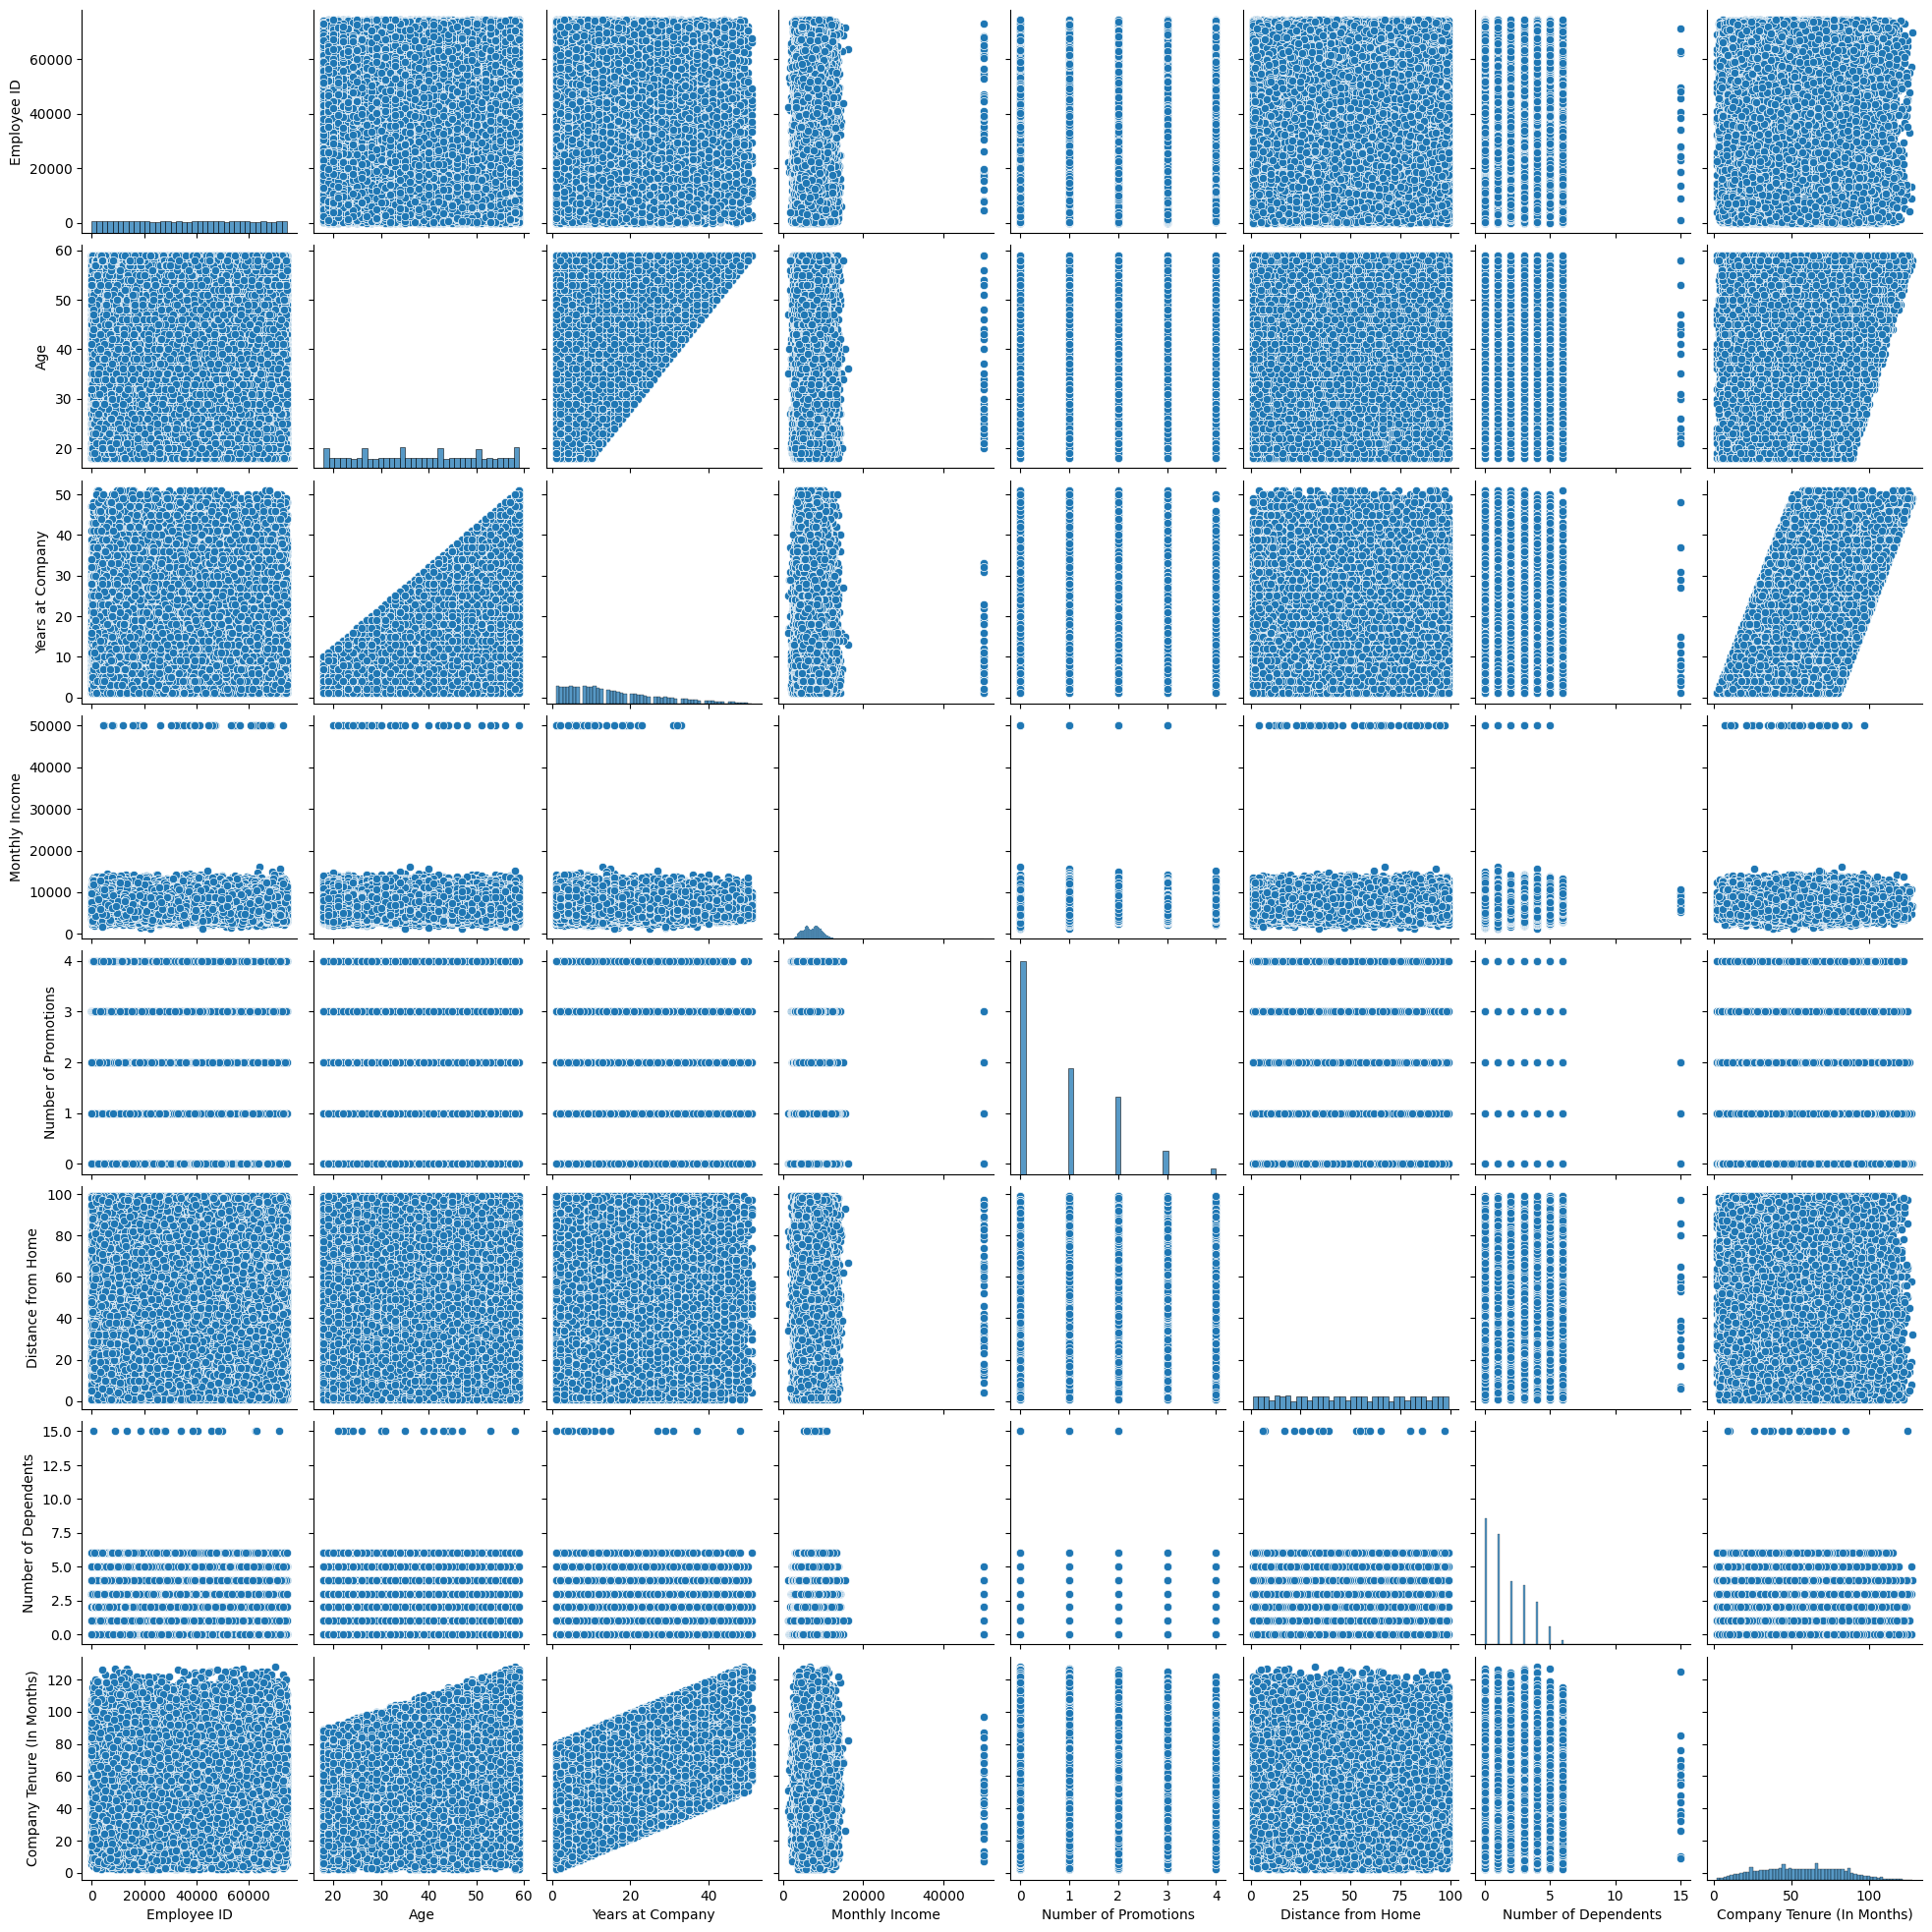

In [391]:
# Plot all the numerical columns to understand their distribution
sns.pairplot(numerical_df)
plt.show()


### **4.2 Perform correlation analysis** <font color="red">[4 Marks]</font>

Check the correlation among different numerical variables.

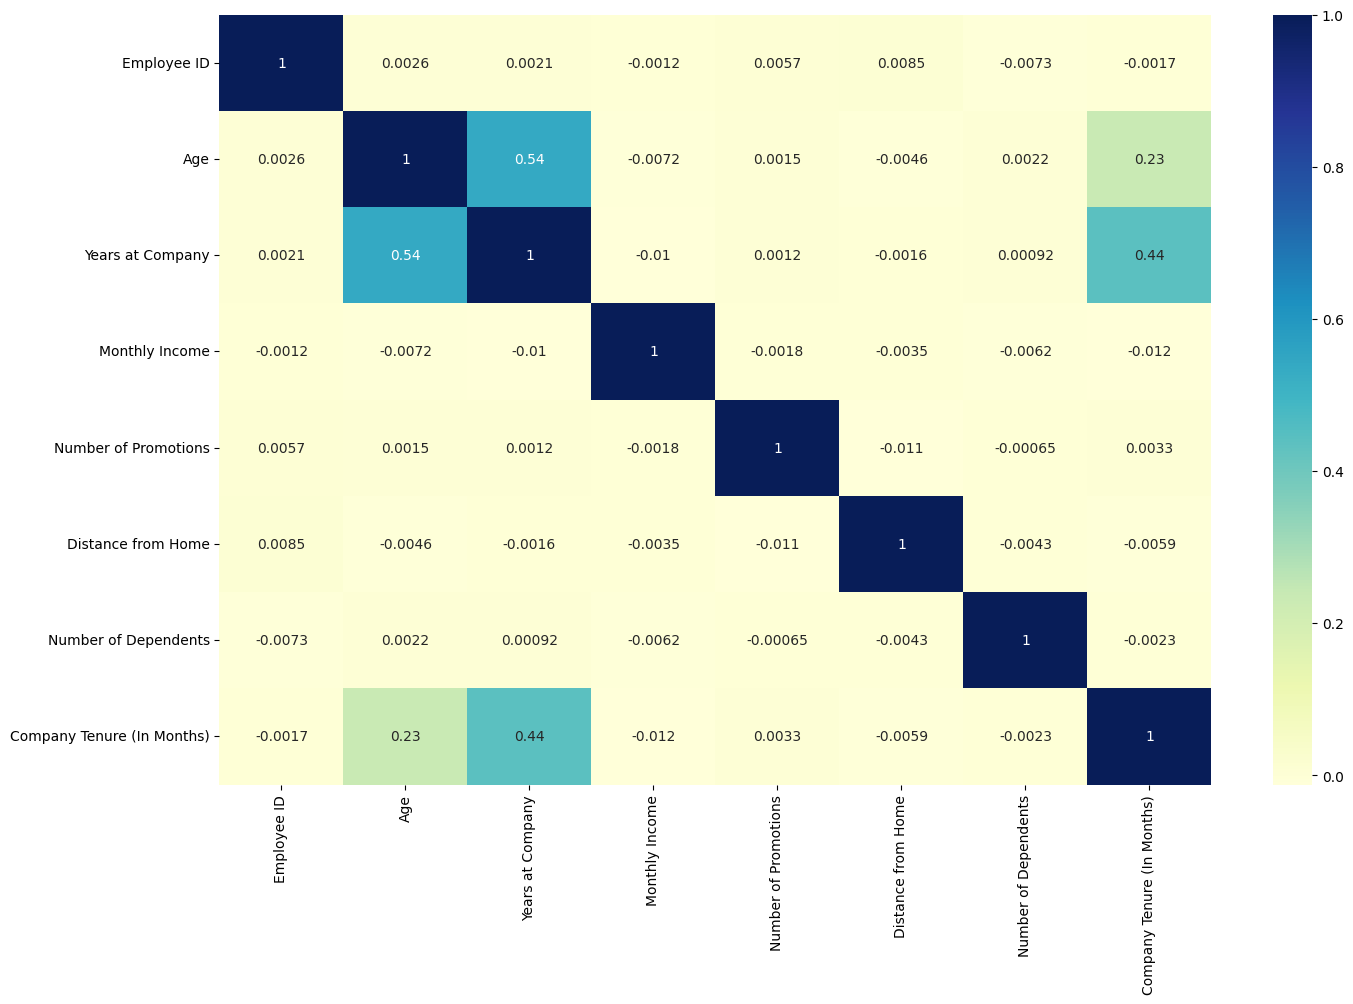

In [392]:
# Create correlation matrix for numerical columns
num_corr = numerical_df.corr()
# Plot Heatmap of the correlation matrix
plt.figure(figsize = (16, 10))
sns.heatmap(num_corr, annot = True, cmap="YlGnBu")
plt.show()

### **4.3 Check class balance** <font color="red">[2 Marks]</font>

Check the distribution of target variable in training set to check class balance.

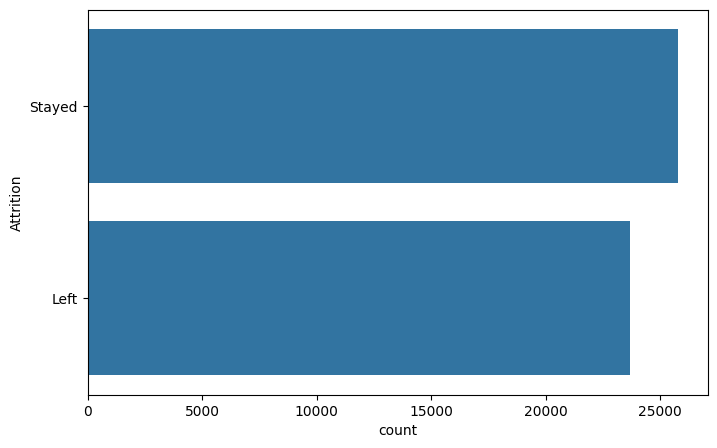

In [393]:
# Plot a bar chart to check class balance
plt.figure(figsize = (8, 5))
sns.countplot(y_train)
plt.show()

### **4.4 Perform bivariate analysis** <font color="red">[8 Marks]</font>

Perform bivariate analysis on training data between all the categorical columns and target variable to  analyse how the categorical variables influence the target variable.

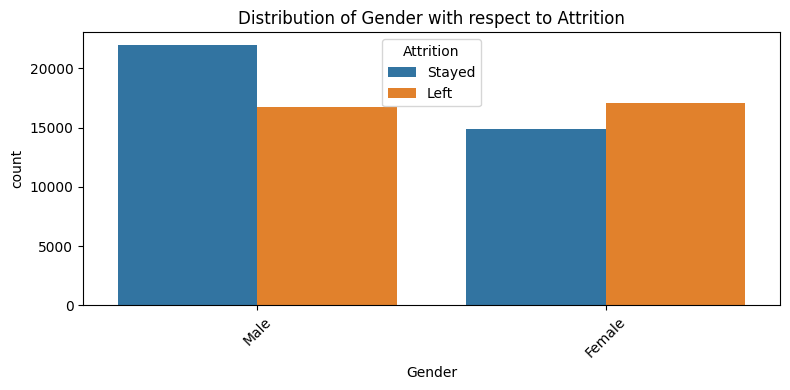

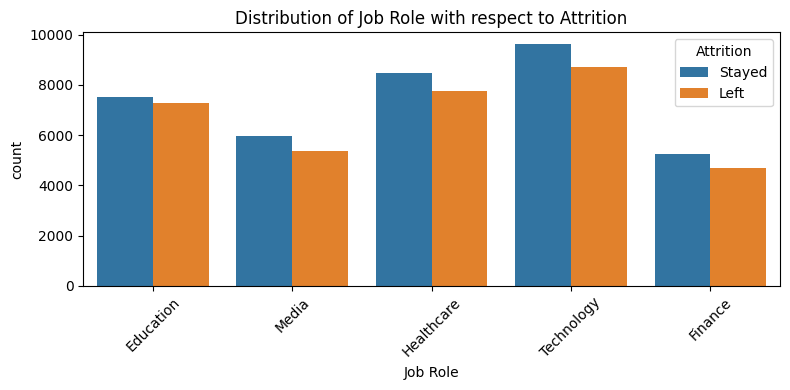

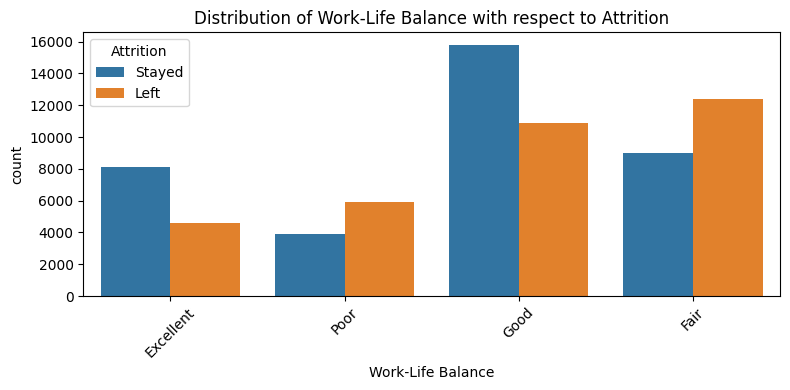

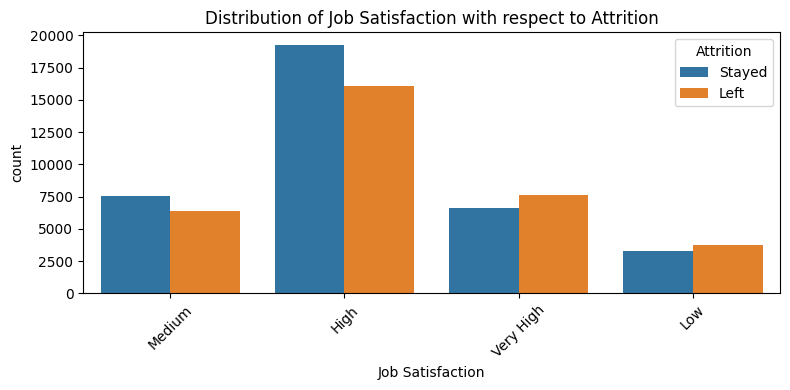

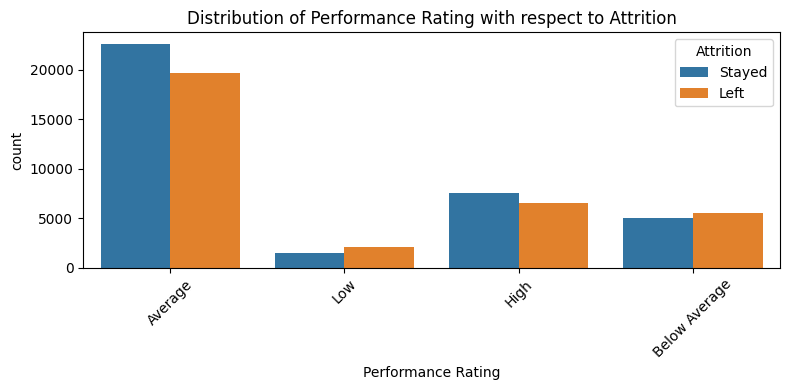

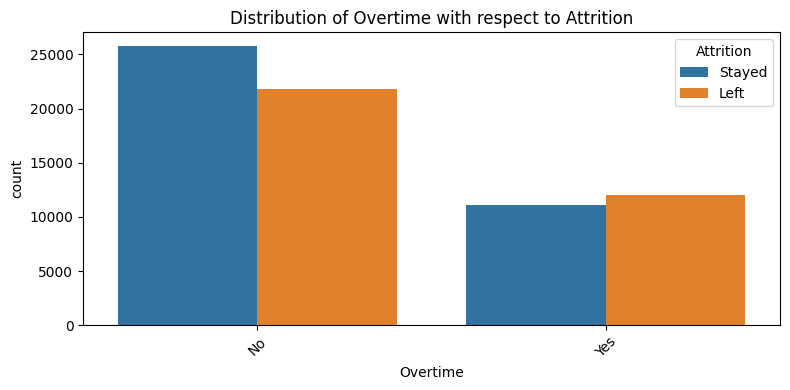

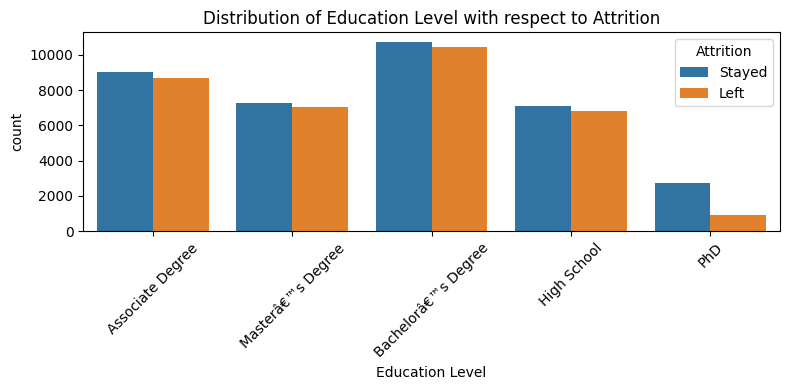

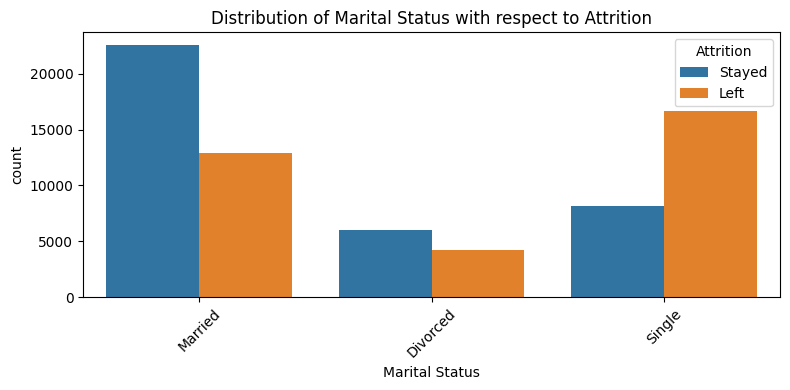

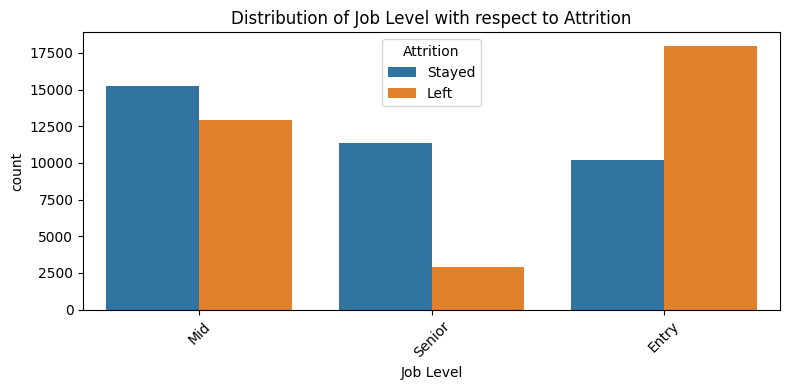

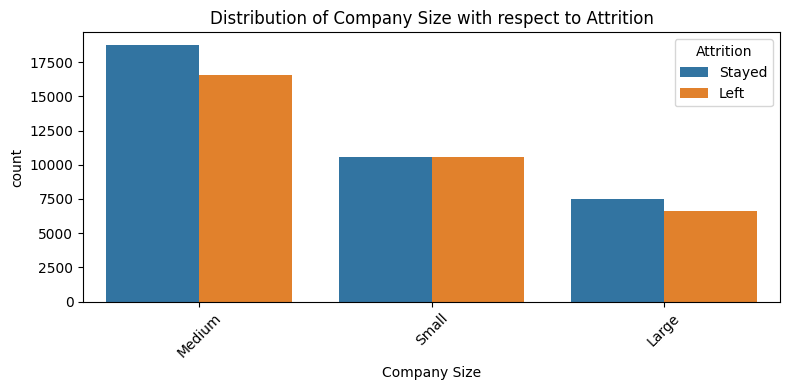

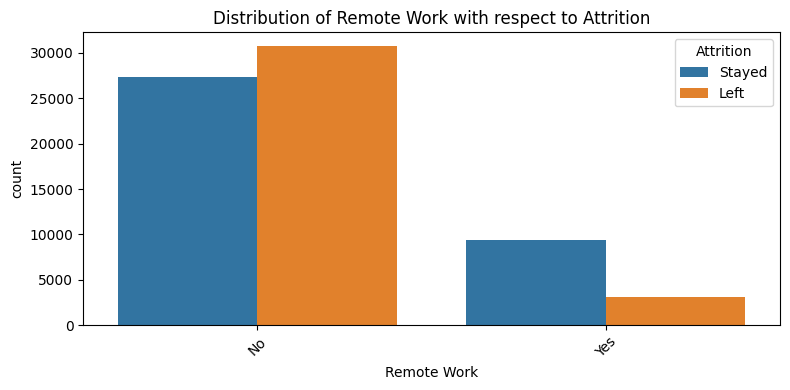

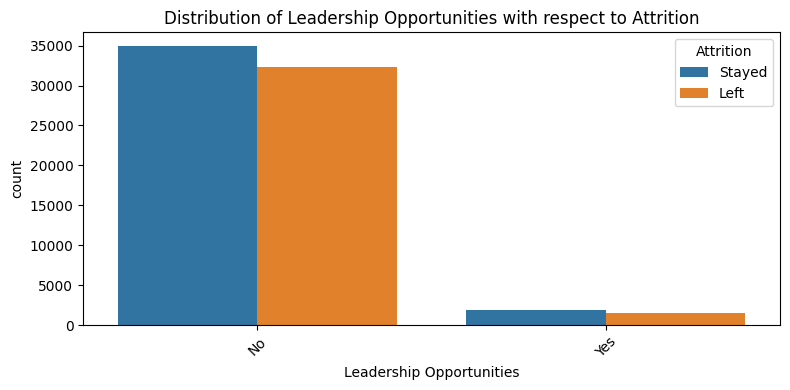

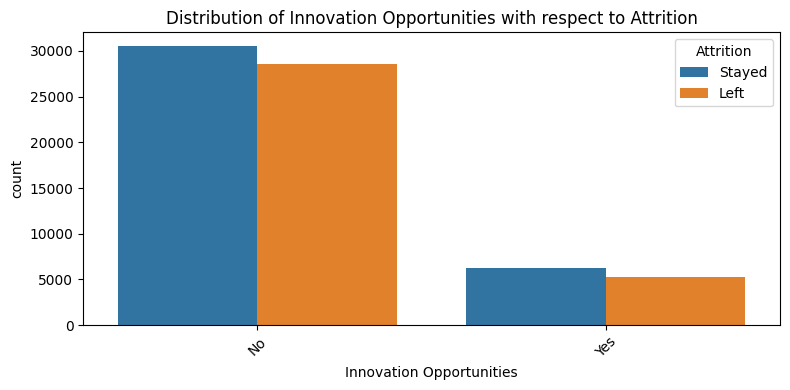

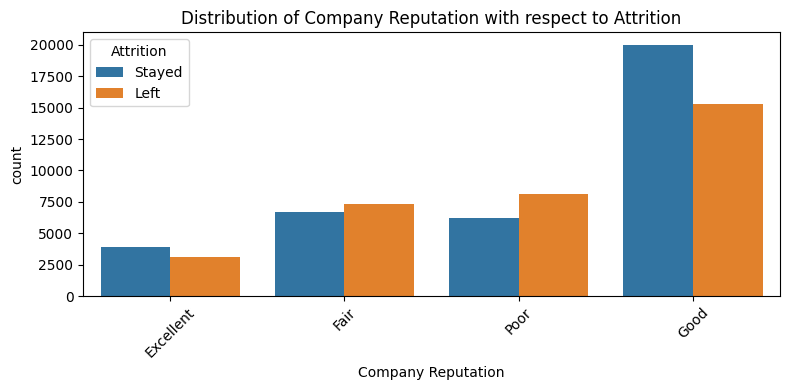

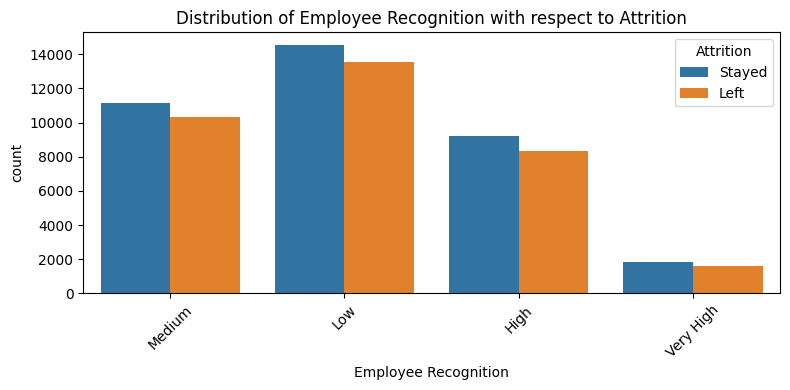

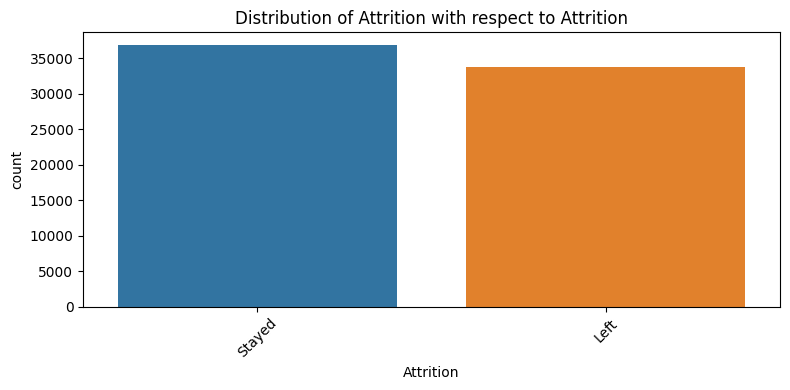

In [394]:
# Plot distribution for each categorical column with target variable

target = 'Attrition'  # Replace with your actual target column

# Identify categorical columns
categorical_columns = employee_retention.select_dtypes(include='object').columns.tolist()

# Plot distribution for each categorical column
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=employee_retention, x=col, hue=target)
    plt.title(f'Distribution of {col} with respect to {target}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


## **5. EDA on validation data** <font color = red>[OPTIONAL]</font>

### **5.1 Perform univariate analysis**

Perform univariate analysis on validation data for all the numerical columns.


5.1.1 Select numerical columns from validation data

In [395]:
# Select numerical columns
numerical_df_test = X_test.select_dtypes(include=['number'])
numerical_df_test.head()

Employee ID  Age  Years at Company  Monthly Income  \
38726        46872   22                 5            8751   
24574        56651   43                19            8585   
21775        55138   39                 2            5462   
42700        54947   30                11            7936   
60433        68822   49                37            5413   

       Number of Promotions  Distance from Home  Number of Dependents  \
38726                     2                32.0                     1   
24574                     2                38.0                     4   
21775                     1                40.0                     1   
42700                     2                21.0                     0   
60433                     1                13.0                     0   

       Company Tenure (In Months)  
38726                        36.0  
24574                        35.0  
21775                        49.0  
42700                        44.0  
60433                        78.0

5.1.2 Plot distribution of numerical columns

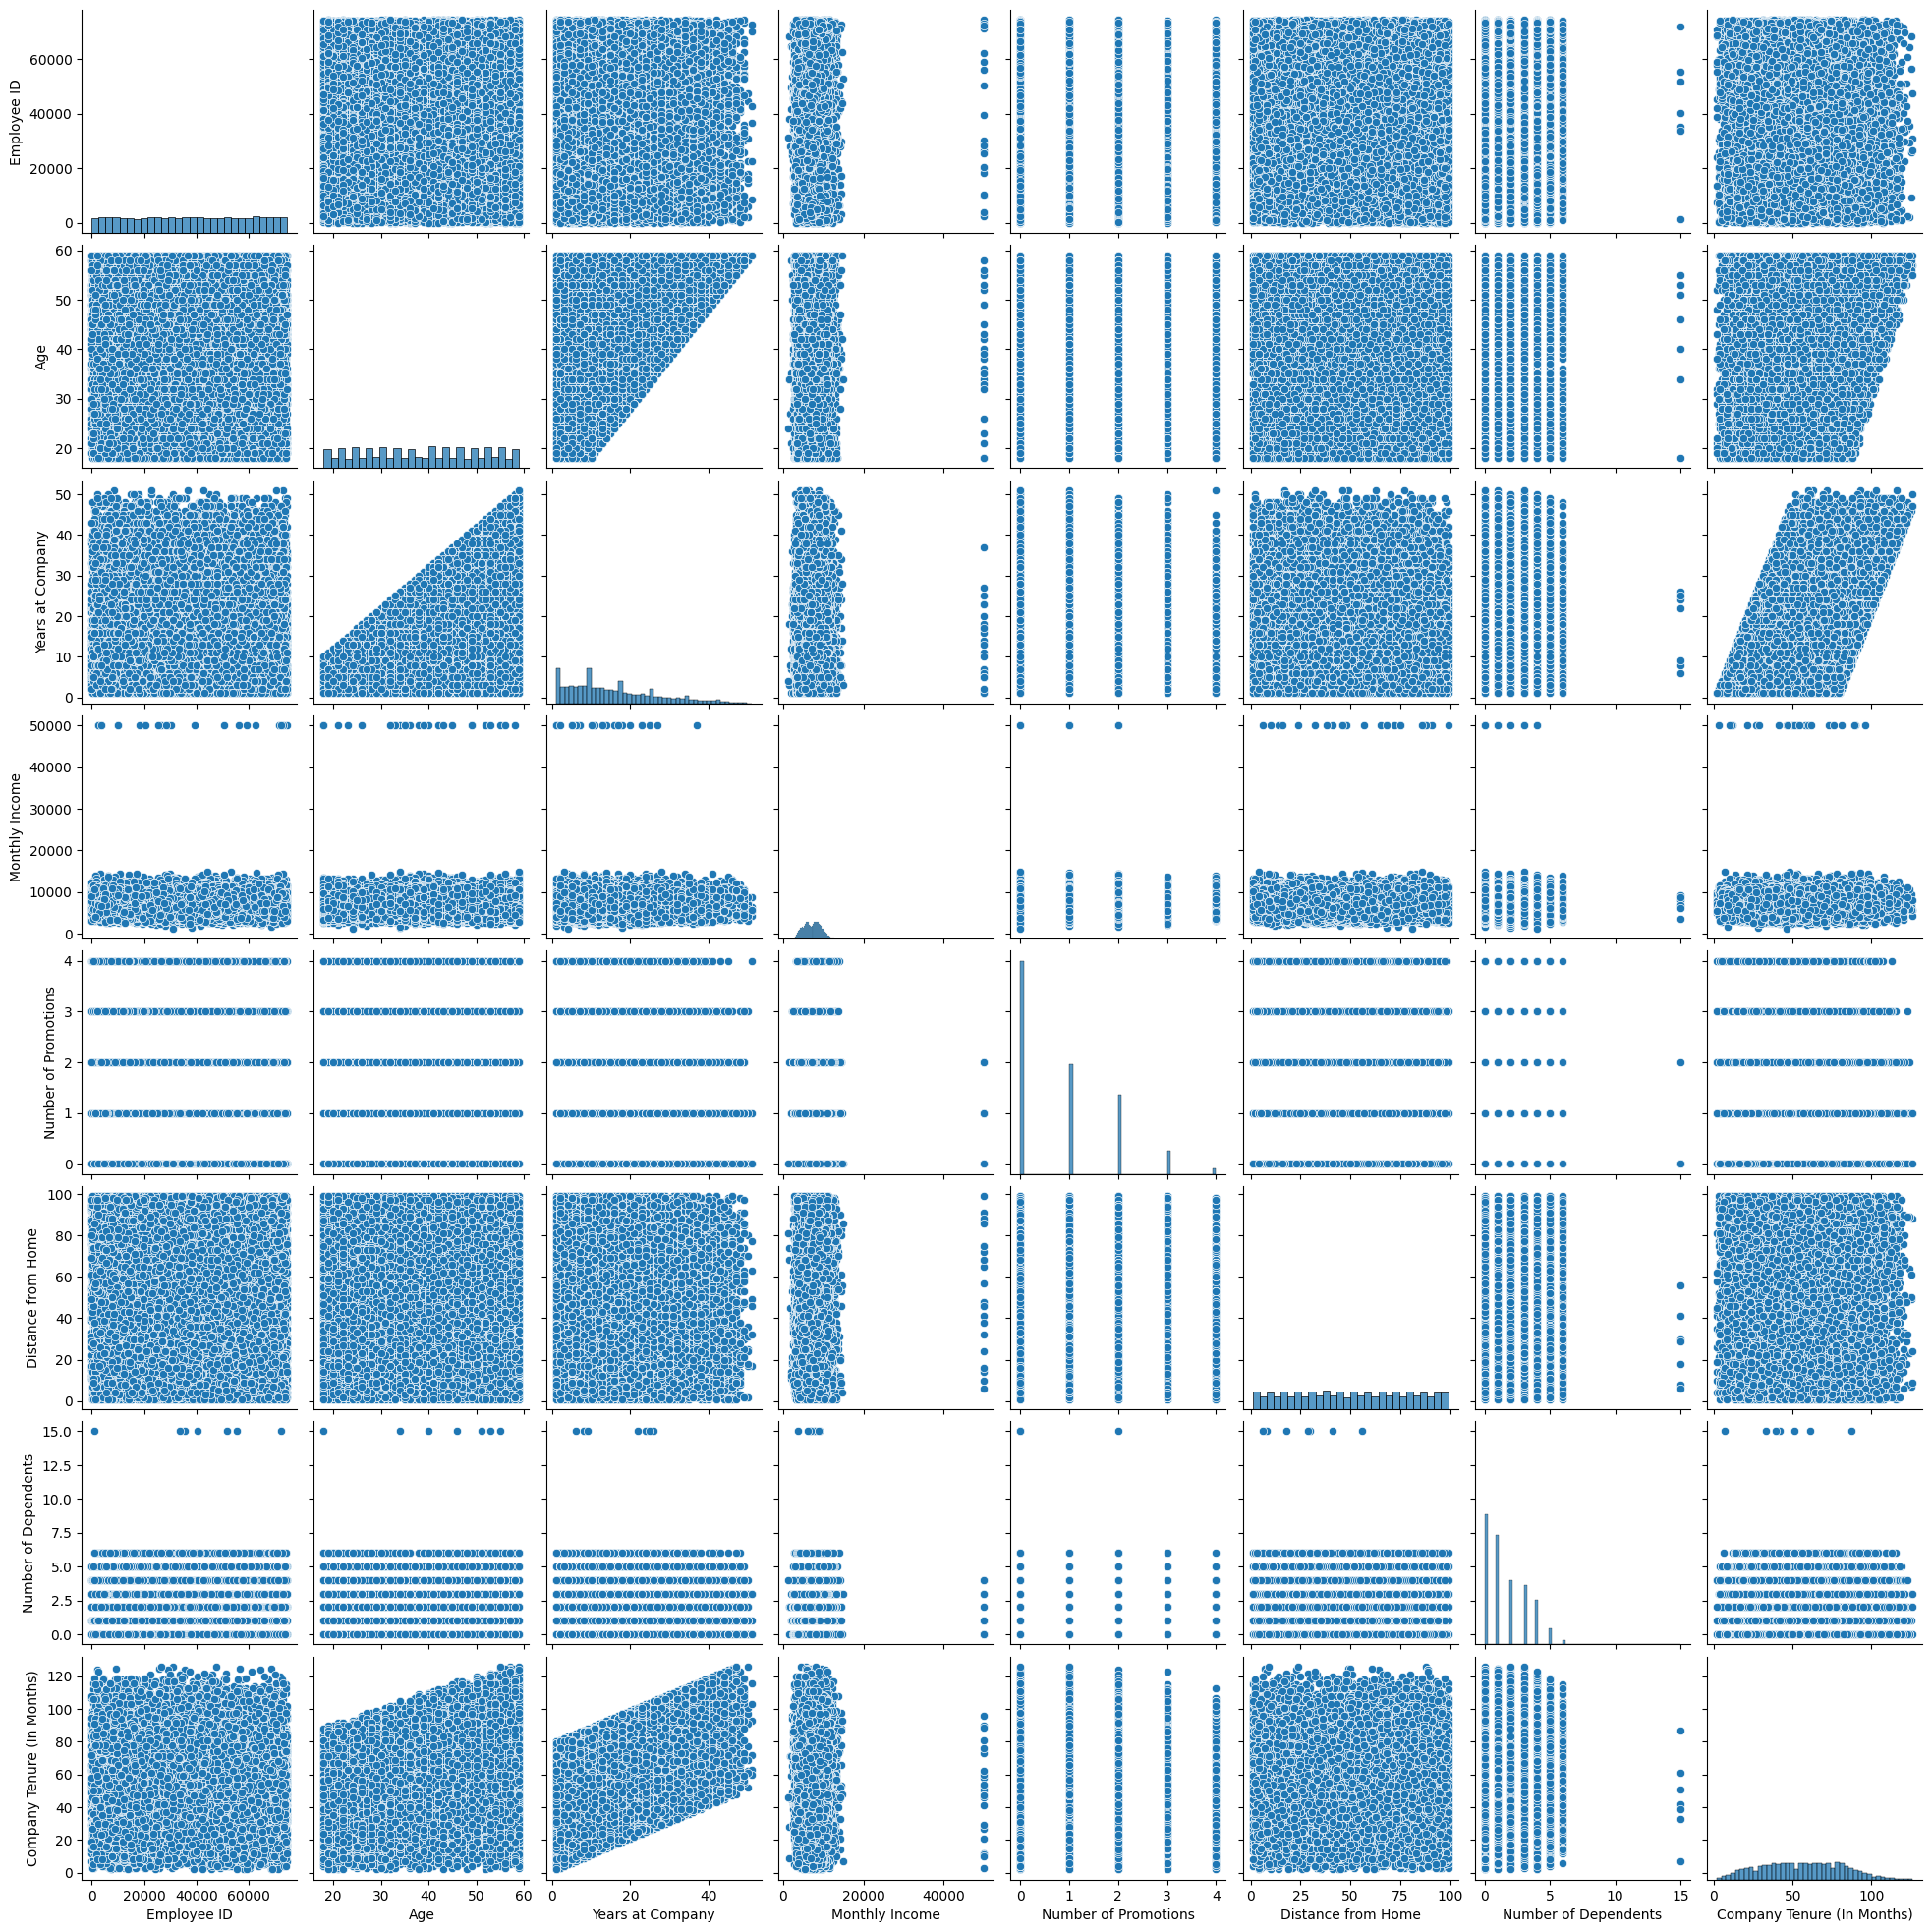

In [396]:
# Plot all the numerical columns to understand their distribution
sns.pairplot(numerical_df_test)
plt.show()

### **5.2 Perform correlation analysis**

Check the correlation among different numerical variables.

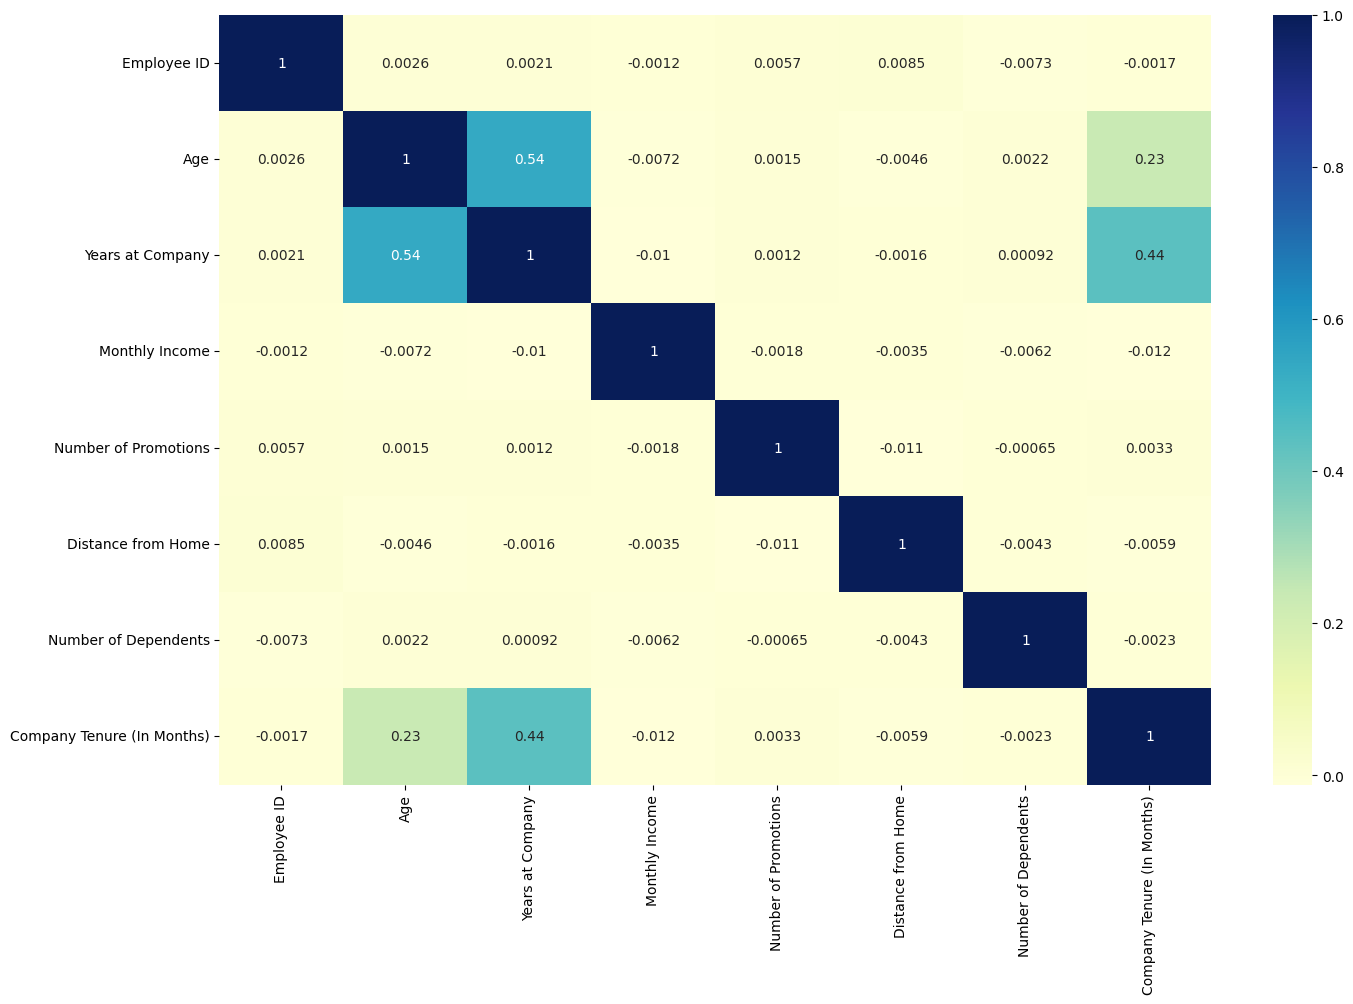

In [397]:
# Create correlation matrix for numerical columns
num_corr_test = numerical_df_test.corr()
# Plot Heatmap of the correlation matrix
plt.figure(figsize = (16, 10))
sns.heatmap(num_corr, annot = True, cmap="YlGnBu")
plt.show()

### **5.3 Check class balance**

Check the distribution of target variable in validation data to check class balance.

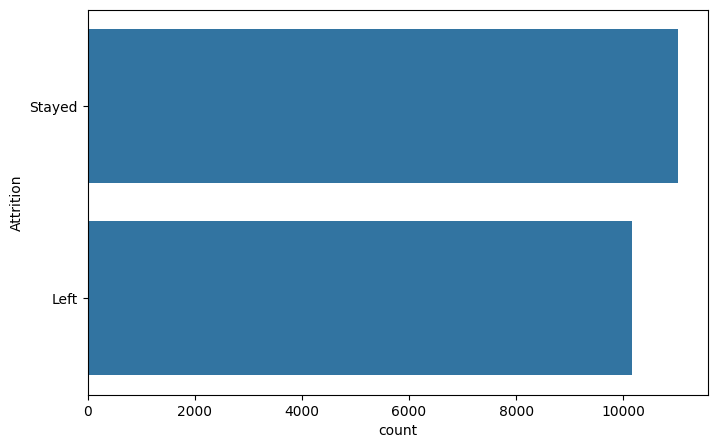

In [398]:
# Plot a bar chart to check class balance
plt.figure(figsize = (8, 5))
sns.countplot(y_test)
plt.show()

### **5.4 Perform bivariate analysis**

Perform bivariate analysis on validation data between all the categorical columns and target variable to analyse how the categorical variables influence the target variable.

In [399]:
# Plot distribution for each categorical column with target variable


## **6. Feature Engineering** <font color = red>[20 marks]</font>

### **6.1 Dummy variable creation** <font color = red>[15 marks]</font>


The next step is to deal with the categorical variables present in the data.

6.1.1 Identify categorical columns where dummy variables are required <font color="red">[1 Mark]</font>

In [400]:
# Check the categorical columns
categorical_columns = X_train.select_dtypes(include='object').columns.tolist()
categorical_columns

['Gender',
 'Job Role',
 'Work-Life Balance',
 'Job Satisfaction',
 'Performance Rating',
 'Overtime',
 'Education Level',
 'Marital Status',
 'Job Level',
 'Company Size',
 'Remote Work',
 'Leadership Opportunities',
 'Innovation Opportunities',
 'Company Reputation',
 'Employee Recognition']

6.1.2 Create dummy variables for independent columns in training set <font color="red">[3 Marks]</font>

In [401]:
# Create dummy variables using the 'get_dummies' for independent columns
dummy1 = pd.get_dummies(X_train[categorical_columns], drop_first=True)

# Add the results to the master DataFrame
X_train = pd.concat([X_train, dummy1], axis=1)
X_train.head()

Employee ID  Age  Gender  Years at Company    Job Role  Monthly Income  \
1516          4409   39  Female                25       Media            5980   
3352         22894   19    Male                 3  Technology            8663   
59196        11939   49  Female                29       Media            6195   
71453        60752   30    Male                 9       Media            5753   
68890        36046   26  Female                15   Education            5811   

      Work-Life Balance Job Satisfaction Performance Rating  \
1516          Excellent           Medium            Average   
3352               Good             High               High   
59196              Good             High            Average   
71453              Good           Medium            Average   
68890              Fair           Medium      Below Average   

       Number of Promotions  ... Company Size_Small  Remote Work_Yes  \
1516                      1  ...              False            False   
3352                      2  ...              False            False   
59196                     0  ...              False            False   
71453                     1  ...              False            False   
68890                     2  ...              False            False   

      Leadership Opportunities_Yes Innovation Opportunities_Yes  \
1516                         False                        False   
3352                         False                        False   
59196                        False                        False   
71453                        False                        False   
68890                        False                        False   

       Company Reputation_Fair Company Reputation_Good  \
1516                     False                   False   
3352                      True                   False   
59196                    False                    True   
71453                    False                   False   
68890                    False                    True   

      Company Reputation_Poor  Employee Recognition_Low  \
1516                     True                     False   
3352                    False                      True   
59196                   False                     False   
71453                    True                      True   
68890                   False                      True   

      Employee Recognition_Medium Employee Recognition_Very High  
1516                         True                          False  
3352                        False                          False  
59196                        True                          False  
71453                       False                          False  
68890                       False                          False  

[5 rows x 57 columns]

Now, drop the original categorical columns and check the DataFrame

In [402]:
# Drop the original categorical columns and check the DataFrame
X_train = X_train.drop(categorical_columns, axis=1)
X_train.head()

Employee ID  Age  Years at Company  Monthly Income  \
1516          4409   39                25            5980   
3352         22894   19                 3            8663   
59196        11939   49                29            6195   
71453        60752   30                 9            5753   
68890        36046   26                15            5811   

       Number of Promotions  Distance from Home  Number of Dependents  \
1516                      1                31.0                     1   
3352                      2                58.0                     4   
59196                     0                66.0                     1   
71453                     1                59.0                     3   
68890                     2                76.0                     2   

       Company Tenure (In Months)  Gender_Male  Job Role_Finance  ...  \
1516                         67.0        False             False  ...   
3352                         78.0         True             False  ...   
59196                        89.0        False             False  ...   
71453                        17.0         True             False  ...   
68890                        89.0        False             False  ...   

       Company Size_Small  Remote Work_Yes  Leadership Opportunities_Yes  \
1516                False            False                         False   
3352                False            False                         False   
59196               False            False                         False   
71453               False            False                         False   
68890               False            False                         False   

       Innovation Opportunities_Yes  Company Reputation_Fair  \
1516                          False                    False   
3352                          False                     True   
59196                         False                    False   
71453                         False                    False   
68890                         False                    False   

       Company Reputation_Good  Company Reputation_Poor  \
1516                     False                     True   
3352                     False                    False   
59196                     True                    False   
71453                    False                     True   
68890                     True                    False   

       Employee Recognition_Low  Employee Recognition_Medium  \
1516                      False                         True   
3352                       True                        False   
59196                     False                         True   
71453                      True                        False   
68890                      True                        False   

       Employee Recognition_Very High  
1516                            False  
3352                            False  
59196                           False  
71453                           False  
68890                           False  

[5 rows x 42 columns]

6.1.3 Create dummy variables for independent columns in validation set <font color="red">[3 Marks]</font>

In [403]:
categorical_columns = X_test.select_dtypes(include='object').columns.tolist()
categorical_columns

['Gender',
 'Job Role',
 'Work-Life Balance',
 'Job Satisfaction',
 'Performance Rating',
 'Overtime',
 'Education Level',
 'Marital Status',
 'Job Level',
 'Company Size',
 'Remote Work',
 'Leadership Opportunities',
 'Innovation Opportunities',
 'Company Reputation',
 'Employee Recognition']

In [404]:
# Create dummy variables using the 'get_dummies' for independent columns
dummy1 = pd.get_dummies(X_test[categorical_columns], drop_first=True)

# Add the results to the master DataFrame
X_test = pd.concat([X_test, dummy1], axis=1)
X_test.head()

Employee ID  Age  Gender  Years at Company    Job Role  Monthly Income  \
38726        46872   22  Female                 5  Healthcare            8751   
24574        56651   43  Female                19  Technology            8585   
21775        55138   39    Male                 2       Media            5462   
42700        54947   30    Male                11  Technology            7936   
60433        68822   49  Female                37       Media            5413   

      Work-Life Balance Job Satisfaction Performance Rating  \
38726              Good        Very High               High   
24574              Good           Medium            Average   
21775              Poor             High            Average   
42700              Good             High            Average   
60433              Good        Very High            Average   

       Number of Promotions  ... Company Size_Small  Remote Work_Yes  \
38726                     2  ...              False            False   
24574                     2  ...              False            False   
21775                     1  ...               True            False   
42700                     2  ...               True            False   
60433                     1  ...               True            False   

      Leadership Opportunities_Yes Innovation Opportunities_Yes  \
38726                        False                         True   
24574                        False                        False   
21775                        False                         True   
42700                        False                        False   
60433                        False                        False   

       Company Reputation_Fair Company Reputation_Good  \
38726                    False                    True   
24574                    False                    True   
21775                    False                   False   
42700                     True                   False   
60433                    False                    True   

      Company Reputation_Poor  Employee Recognition_Low  \
38726                   False                     False   
24574                   False                      True   
21775                   False                      True   
42700                   False                     False   
60433                   False                     False   

      Employee Recognition_Medium Employee Recognition_Very High  
38726                       False                           True  
24574                       False                          False  
21775                       False                          False  
42700                       False                          False  
60433                        True                          False  

[5 rows x 57 columns]

Now, drop the original categorical columns and check the DataFrame

In [405]:
# Drop categorical columns and check the DataFrame
X_test = X_test.drop(categorical_columns, axis=1)
X_test.head()

Employee ID  Age  Years at Company  Monthly Income  \
38726        46872   22                 5            8751   
24574        56651   43                19            8585   
21775        55138   39                 2            5462   
42700        54947   30                11            7936   
60433        68822   49                37            5413   

       Number of Promotions  Distance from Home  Number of Dependents  \
38726                     2                32.0                     1   
24574                     2                38.0                     4   
21775                     1                40.0                     1   
42700                     2                21.0                     0   
60433                     1                13.0                     0   

       Company Tenure (In Months)  Gender_Male  Job Role_Finance  ...  \
38726                        36.0        False             False  ...   
24574                        35.0        False             False  ...   
21775                        49.0         True             False  ...   
42700                        44.0         True             False  ...   
60433                        78.0        False             False  ...   

       Company Size_Small  Remote Work_Yes  Leadership Opportunities_Yes  \
38726               False            False                         False   
24574               False            False                         False   
21775                True            False                         False   
42700                True            False                         False   
60433                True            False                         False   

       Innovation Opportunities_Yes  Company Reputation_Fair  \
38726                          True                    False   
24574                         False                    False   
21775                          True                    False   
42700                         False                     True   
60433                         False                    False   

       Company Reputation_Good  Company Reputation_Poor  \
38726                     True                    False   
24574                     True                    False   
21775                    False                    False   
42700                    False                    False   
60433                     True                    False   

       Employee Recognition_Low  Employee Recognition_Medium  \
38726                     False                        False   
24574                      True                        False   
21775                      True                        False   
42700                     False                        False   
60433                     False                         True   

       Employee Recognition_Very High  
38726                            True  
24574                           False  
21775                           False  
42700                           False  
60433                           False  

[5 rows x 42 columns]

6.1.4 Create DataFrame for dependent column in both training and validation set <font color = "red">[1 Mark]</font>

In [406]:
# Convert y_train and y_validation to DataFrame to create dummy variables
y_train = pd.DataFrame(data=y_train, columns=['Attrition'])
y_test = pd.DataFrame(data=y_test, columns=['Attrition'])

6.1.5 Create dummy variables for dependent column in training set <font color="red">[3 Marks]</font>

In [407]:
# Create dummy variables using the 'get_dummies' for dependent column
dummy1 = pd.get_dummies(y_train.Attrition, drop_first=True)

# Add the results to the master DataFrame
y_train = pd.concat([y_train, dummy1], axis=1)
y_train.head()

Attrition  Stayed
1516     Stayed    True
3352     Stayed    True
59196      Left   False
71453      Left   False
68890      Left   False

6.1.6 Create dummy variable for dependent column in validation set <font color = "red">[3 Marks]</font>

In [408]:
# Create dummy variables using the 'get_dummies' for dependent column
dummy1 = pd.get_dummies(y_test.Attrition, drop_first=True)

# Add the results to the master DataFrame
y_test = pd.concat([y_test, dummy1], axis=1)
y_test.head()

Attrition  Stayed
38726    Stayed    True
24574    Stayed    True
21775    Stayed    True
42700    Stayed    True
60433      Left   False

6.1.7 Drop redundant columns <font color="red">[1 Mark]</font>

In [409]:
# Drop redundant columns from both train and validation
y_train = y_train.drop('Attrition', axis=1)
y_test = y_test.drop('Attrition', axis=1)


### **6.2 Feature scaling** <font color = red>[5 marks]</font>

Apply feature scaling to the numeric columns to bring them to a common range and ensure consistent scaling.

6.2.1 Import required libraries <font color="red">[1 Mark]</font>

In [410]:
# Import the necessary scaling tool from scikit-learn
from sklearn.preprocessing import StandardScaler

6.2.2 Scale the numerical features <font color="red">[4 Marks]</font>

In [411]:
scaler = StandardScaler()

In [412]:
# Scale the numeric features present in the training set
X_train[['Age',
 'Years at Company',
 'Monthly Income',
 'Number of Promotions',
 'Distance from Home',
 'Number of Dependents',
 'Company Tenure (In Months)']] = scaler.fit_transform(X_train[['Age',
 'Years at Company',
 'Monthly Income',
 'Number of Promotions',
 'Distance from Home',
 'Number of Dependents',
 'Company Tenure (In Months)']])
# Scale the numerical features present in the validation set
X_test[['Age',
 'Years at Company',
 'Monthly Income',
 'Number of Promotions',
 'Distance from Home',
 'Number of Dependents',
 'Company Tenure (In Months)']] = scaler.fit_transform(X_test[['Age',
 'Years at Company',
 'Monthly Income',
 'Number of Promotions',
 'Distance from Home',
 'Number of Dependents',
 'Company Tenure (In Months)']])

## **7. Model Building** <font color = red>[40 marks]</font>

### **7.1 Feature selection** <font color = red>[5 marks]</font>

As there are a lot of variables present in the data, Recursive Feature Elimination (RFE) will be used to select the most influential features for building the model.

7.1.1 Import required libraries <font color="red">[1 Mark]</font>

In [413]:
# Import 'LogisticRegression' and create a LogisticRegression object
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

7.1.2 Import RFE  and select 15 variables <font color="red">[3 Mark]</font>

In [414]:
# Import RFE and select 15 variables
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [415]:
# Display the features selected by RFE
X_train.columns[rfe.support_]

Index(['Gender_Male', 'Work-Life Balance_Fair', 'Work-Life Balance_Poor',
       'Job Satisfaction_Low', 'Job Satisfaction_Very High',
       'Performance Rating_Below Average', 'Performance Rating_Low',
       'Overtime_Yes', 'Education Level_PhD', 'Marital Status_Single',
       'Job Level_Mid', 'Job Level_Senior', 'Remote Work_Yes',
       'Company Reputation_Fair', 'Company Reputation_Poor'],
      dtype='object')

7.1.3 Store the selected features <font color="red">[1 Mark]</font>




In [416]:
# Put columns selected by RFE into variable 'col'
col = X_train.columns[rfe.support_] 

### **7.2 Building Logistic Regression Model** <font color = red>[20 marks]</font>

Now that you have selected the variables through RFE, use these features to build a logistic regression model with statsmodels. This will allow you to assess the statistical aspects, such as p-values and VIFs, which are important for checking multicollinearity and ensuring that the predictors are not highly correlated with each other, as this could distort the model's coefficients.

7.2.1 Select relevant columns on training set <font color="red">[1 Mark]</font>

In [417]:
# Select only the columns selected by RFE
X_train1 = X_train[col]

In [418]:
# View the training data
X_train1.head()

Gender_Male  Work-Life Balance_Fair  Work-Life Balance_Poor  \
1516         False                   False                   False   
3352          True                   False                   False   
59196        False                   False                   False   
71453         True                   False                   False   
68890        False                    True                   False   

       Job Satisfaction_Low  Job Satisfaction_Very High  \
1516                  False                       False   
3352                  False                       False   
59196                 False                       False   
71453                 False                       False   
68890                 False                       False   

       Performance Rating_Below Average  Performance Rating_Low  Overtime_Yes  \
1516                              False                   False         False   
3352                              False                   False         False   
59196                             False                   False         False   
71453                             False                   False          True   
68890                              True                   False         False   

       Education Level_PhD  Marital Status_Single  Job Level_Mid  \
1516                 False                  False          False   
3352                 False                  False          False   
59196                False                  False           True   
71453                False                  False          False   
68890                False                  False          False   

       Job Level_Senior  Remote Work_Yes  Company Reputation_Fair  \
1516              False            False                    False   
3352               True            False                     True   
59196             False            False                    False   
71453             False            False                    False   
68890              True            False                    False   

       Company Reputation_Poor  
1516                      True  
3352                     False  
59196                    False  
71453                     True  
68890                    False

In [419]:

def binary_map(x):
    return x.map({True: 1, False: 0})

In [420]:
X_train1 = X_train1.apply(binary_map)

In [421]:
X_train1.head()

Gender_Male  Work-Life Balance_Fair  Work-Life Balance_Poor  \
1516             0                       0                       0   
3352             1                       0                       0   
59196            0                       0                       0   
71453            1                       0                       0   
68890            0                       1                       0   

       Job Satisfaction_Low  Job Satisfaction_Very High  \
1516                      0                           0   
3352                      0                           0   
59196                     0                           0   
71453                     0                           0   
68890                     0                           0   

       Performance Rating_Below Average  Performance Rating_Low  Overtime_Yes  \
1516                                  0                       0             0   
3352                                  0                       0             0   
59196                                 0                       0             0   
71453                                 0                       0             1   
68890                                 1                       0             0   

       Education Level_PhD  Marital Status_Single  Job Level_Mid  \
1516                     0                      0              0   
3352                     0                      0              0   
59196                    0                      0              1   
71453                    0                      0              0   
68890                    0                      0              0   

       Job Level_Senior  Remote Work_Yes  Company Reputation_Fair  \
1516                  0                0                        0   
3352                  1                0                        1   
59196                 0                0                        0   
71453                 0                0                        0   
68890                 1                0                        0   

       Company Reputation_Poor  
1516                         1  
3352                         0  
59196                        0  
71453                        1  
68890                        0

7.2.2 Add constant to training set <font color = "red">[1 Mark]</font>

In [422]:
# Import statsmodels and add constant to training set
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train1)

7.2.3 Fit logistic regression model <font color="red">[3 Marks]</font>

In [423]:
X_train_sm

const  Gender_Male  Work-Life Balance_Fair  Work-Life Balance_Poor  \
1516     1.0            0                       0                       0   
3352     1.0            1                       0                       0   
59196    1.0            0                       0                       0   
71453    1.0            1                       0                       0   
68890    1.0            0                       1                       0   
...      ...          ...                     ...                     ...   
15937    1.0            0                       0                       0   
66958    1.0            1                       0                       0   
69203    1.0            1                       0                       0   
59485    1.0            0                       1                       0   
40956    1.0            0                       0                       0   

       Job Satisfaction_Low  Job Satisfaction_Very High  \
1516                      0                           0   
3352                      0                           0   
59196                     0                           0   
71453                     0                           0   
68890                     0                           0   
...                     ...                         ...   
15937                     0                           1   
66958                     0                           0   
69203                     0                           0   
59485                     0                           0   
40956                     0                           0   

       Performance Rating_Below Average  Performance Rating_Low  Overtime_Yes  \
1516                                  0                       0             0   
3352                                  0                       0             0   
59196                                 0                       0             0   
71453                                 0                       0             1   
68890                                 1                       0             0   
...                                 ...                     ...           ...   
15937                                 0                       0             0   
66958                                 0                       0             0   
69203                                 0                       0             0   
59485                                 0                       0             1   
40956                                 0                       0             0   

       Education Level_PhD  Marital Status_Single  Job Level_Mid  \
1516                     0                      0              0   
3352                     0                      0              0   
59196                    0                      0              1   
71453                    0                      0              0   
68890                    0                      0              0   
...                    ...                    ...            ...   
15937                    0                      0              0   
66958                    0                      0              0   
69203                    0                      0              0   
59485                    0                      0              0   
40956                    0                      0              0   

       Job Level_Senior  Remote Work_Yes  Company Reputation_Fair  \
1516                  0                0                        0   
3352                  1                0                        1   
59196                 0                0                        0   
71453                 0                0                        0   
68890                 1                0                        0   
...                 ...              ...                      ...   
15937                 0                0                        0   
66958                 0        

In [424]:
# Fit a logistic regression model on X_train after adding a constant and output the summary
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 Stayed   No. Observations:                49444
Model:                            GLM   Df Residuals:                    49428
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -25072.
Date:                Sun, 24 Aug 2025   Deviance:                       50143.
Time:                        16:04:28   Pearson chi2:                 4.64e+04
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3095
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                0.2356      0.028      8.336      0.000       0.180       0.291
Gender_Male                          0.5738      0.022     25.875      0.000       0.530       0.617
Work-Life Balance_Fair              -1.0572      0.025    -41.957      0.000      -1.107      -1.008
Work-Life Balance_Poor              -1.2489      0.034    -37.262      0.000      -1.315      -1.183
Job Satisfaction_Low                -0.4914      0.037    -13.282      0.000      -0.564      -0.419
Job Satisfaction_Very High          -0.4829      0.028    -17.462      0.000      -0.537      -0.429
Performance Rating_Below Average    -0.3079      0.031    -10.012      0.000      -0.368      -0.248
Performance Rating_Low              -0.5673      0.051    -11.058      0.000      -0.668      -0.467
Overtime_Yes                        -0.3286      0.023    -14.053      0.000      -0.374      -0.283
Education Level_PhD                  1.4826      0.055     27.084      0.000       1.375       1.590
Marital Status_Single               -1.6887      0.025    -68.644      0.000      -1.737      -1.640
Job Level_Mid                        0.9611      0.024     39.780      0.000       0.914       1.008
Job Level_Senior                     2.5326      0.035     73.125      0.000       2.465       2.600
Remote Work_Yes                      1.7154      0.032     53.379      0.000       1.652       1.778
Company Reputation_Fair             -0.5296      0.028    -18.633      0.000      -0.585      -0.474
Company Reputation_Poor             -0.7359      0.029    -25.758      0.000      -0.792      -0.680
====================================================================================================
"""

**Model Interpretation**

The output summary table  will provide the features used for building model along with coefficient of each of the feature and their p-value. The p-value in a logistic regression model is used to assess the statistical significance of each coefficient. Lesser the p-value, more significant the feature is in the model.

A positive coefficient will indicate that an increase in the value of feature would increase the odds of the event occurring. On the other hand, a negative coefficient means the opposite, i.e,  an increase in the value of feature would decrease the odds of the event occurring.



7.2.4 Evaluate VIF of features <font color="red">[3 Marks]</font>

In [425]:
# Import 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [426]:
# Make a VIF DataFrame for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train1[col].columns
vif['VIF'] = [variance_inflation_factor(X_train1[col].values, i) for i in range(X_train1[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                        Gender_Male  1.83
10                     Job Level_Mid  1.65
9              Marital Status_Single  1.42
1             Work-Life Balance_Fair  1.41
7                       Overtime_Yes  1.39
11                  Job Level_Senior  1.33
14           Company Reputation_Poor  1.26
13           Company Reputation_Fair  1.26
4         Job Satisfaction_Very High  1.23
12                   Remote Work_Yes  1.18
2             Work-Life Balance_Poor  1.18
5   Performance Rating_Below Average  1.15
3               Job Satisfaction_Low  1.12
6             Performance Rating_Low  1.05
8                Education Level_PhD  1.05

Proceed to the next step if p-values and VIFs are within acceptable ranges.  If you observe high p-values or VIFs, create new cells to drop the features and retrain the model.

7.2.5 Make predictions on training set <font color = "red">[2 Marks]</font>

In [427]:
# Predict the probabilities on the training set
y_train_pred = res.predict(X_train_sm)
y_train_pred

1516     0.377470
3352     0.943345
59196    0.767937
71453    0.436563
68890    0.802680
           ...   
15937    0.438490
66958    0.691981
69203    0.965842
59485    0.799381
40956    0.940935
Length: 49444, dtype: float64

7.2.6 Format the prediction output <font color="red">[1 Mark]</font>

In [428]:
# Reshape it into an array
y_train_pred1 = y_train_pred.values.reshape(-1)
y_train_pred1[:10]

array([0.37746979, 0.94334509, 0.76793652, 0.4365627 , 0.80267965,
       0.02054991, 0.58090374, 0.80556731, 0.48127939, 0.58090374])

7.2.7 Create a DataFrame with the actual stayed flag and the predicted probabilities <font color="red">[1 Mark]</font>

In [429]:
y_train1 = y_train.values.reshape(-1)

In [430]:
y_train1.shape

(49444,)

In [431]:
# y_train = y_train.apply(binary_map)

In [432]:
# Create a new DataFrame containing the actual stayed flag and the probabilities predicted by the model
y_train_pred_final = pd.DataFrame({'Stayed':y_train1, 'Prob':y_train_pred1})
# y_train_pred_final['EmployeeID'] = y_train.index
y_train_pred_final.head()

Stayed      Prob
0    True  0.377470
1    True  0.943345
2   False  0.767937
3   False  0.436563
4   False  0.802680

7.2.8 Create a new column 'Predicted' with 1 if predicted probabilities are greater than 0.5 else 0 <font color = "red">[1 Mark]</font>

In [433]:
# Create a new column 'Predicted' with 1 if predicted probabilities are greater than 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

Stayed      Prob  predicted
0    True  0.377470          0
1    True  0.943345          1
2   False  0.767937          1
3   False  0.436563          0
4   False  0.802680          1

**Evaluation of performance of Model**

Evaluate the performance of the model based on the predictions made on the training set.


7.2.9 Check the accuracy of the model based on the predictions made on the training set <font color = "red">[1 Mark]</font>

In [434]:
# Import metrics from sklearn for evaluation
from sklearn import metrics

# Check the overall accuracy
print(metrics.accuracy_score(y_train_pred_final.Stayed, y_train_pred_final.predicted))

0.738734730199822


7.2.10 Create a confusion matrix based on the predictions made on the training set <font color="red">[1 mark]</font>

In [435]:
# Create confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Stayed, y_train_pred_final.predicted )
print(confusion)

[[17104  6559]
 [ 6359 19422]]


7.2.11 Create variables for true positive, true negative, false positive and false negative <font color="red">[1 Mark]</font>

In [436]:
# Create variables for true positive, true negative, false positive and false negative
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

7.2.12 Calculate sensitivity and specificity of model  <font color="red">[2 Marks]</font>

In [437]:
# Calculate sensitivity
TP / float(TP+FN)

np.float64(0.7533454869865405)

In [438]:
# Calculate specificity
TN / float(TN+FP)

np.float64(0.7228162109622618)

7.2.13 Calculate precision and recall of model <font color="red">[2 Marks]</font>

In [439]:
# Calculate precision
TP/float(TP+FP)

np.float64(0.7475462838227935)

In [440]:
# Calculate recall
TP / float(TP+FN)

np.float64(0.7533454869865405)

### **7.3 Find the optimal cutoff** <font color = red>[15 marks]</font>

Find the optimal cutoff to improve model performance. While a default threshold of 0.5 was used for initial evaluation, optimising this threshold can enhance the model's performance.

First, plot the ROC curve and check AUC.



7.3.1 Plot ROC curve <font color="red">[3 Marks]</font>

In [441]:
# Define ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [442]:
# Call the ROC function
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Stayed, y_train_pred_final.Prob, drop_intermediate = False )

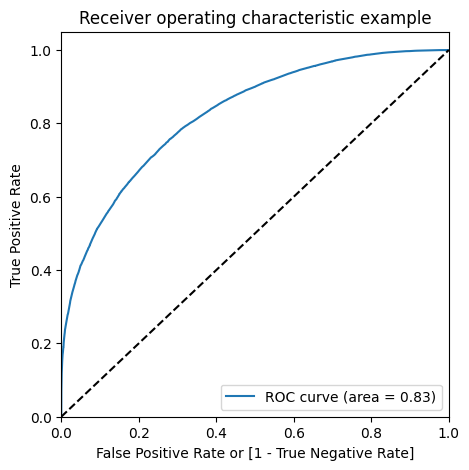

In [443]:
draw_roc(y_train_pred_final.Stayed, y_train_pred_final.Prob)

**Sensitivity and Specificity tradeoff**

Check sensitivity and specificity tradeoff to find the optimal cutoff point.

7.3.2 Predict on training set at various probability cutoffs <font color="red">[1 Mark]</font>

In [444]:
# Predict on training data by creating columns with different probability cutoffs to explore the impact of cutoff on model performance
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Stayed      Prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  \
0    True  0.377470          0    1    1    1    1    0    0    0    0    0   
1    True  0.943345          1    1    1    1    1    1    1    1    1    1   
2   False  0.767937          1    1    1    1    1    1    1    1    1    0   
3   False  0.436563          0    1    1    1    1    1    0    0    0    0   
4   False  0.802680          1    1    1    1    1    1    1    1    1    1   

   0.9  
0    0  
1    1  
2    0  
3    0  
4    0

7.3.3 Plot for accuracy, sensitivity, specificity at different probability cutoffs <font color="red">[2 Marks]</font>

In [445]:
# Create a DataFrame to see the values of accuracy, sensitivity, and specificity at different values of probability cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Stayed, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.521418  1.000000  0.000000
0.1   0.1  0.587392  0.994686  0.143642
0.2   0.2  0.659352  0.961289  0.330389
0.3   0.3  0.703968  0.909623  0.479905
0.4   0.4  0.731312  0.839455  0.613489
0.5   0.5  0.738735  0.753345  0.722816
0.6   0.6  0.729209  0.644467  0.821536
0.7   0.7  0.704939  0.527714  0.898026
0.8   0.8  0.660464  0.387689  0.957655
0.9   0.9  0.587614  0.215973  0.992520


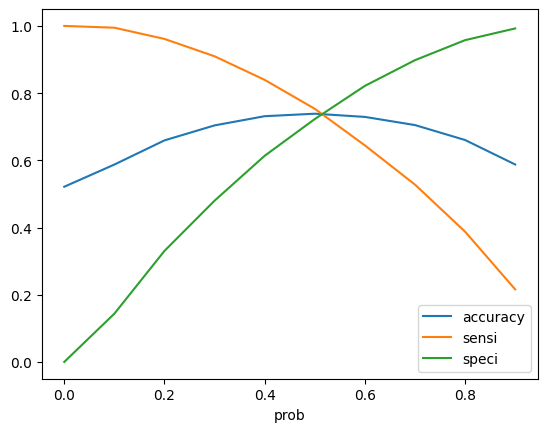

In [446]:
# Plot accuracy, sensitivity, and specificity at different values of probability cutoffs
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

7.3.4 Create a column for final prediction based on the optimal cutoff <font color="red">[2 Marks]</font>

In [447]:
# Create a column for final prediction based on the optimal cutoff
y_train_pred_final['final_predicted'] = y_train_pred_final.Prob.map( lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

Stayed      Prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  \
0    True  0.377470          0    1    1    1    1    0    0    0    0    0   
1    True  0.943345          1    1    1    1    1    1    1    1    1    1   
2   False  0.767937          1    1    1    1    1    1    1    1    1    0   
3   False  0.436563          0    1    1    1    1    1    0    0    0    0   
4   False  0.802680          1    1    1    1    1    1    1    1    1    1   

   0.9  final_predicted  
0    0                0  
1    1                1  
2    0                1  
3    0                0  
4    0                1

7.3.5 Calculate model's accuracy <font color="red">[1Mark]</font>

In [448]:
# Calculate the accuracy
metrics.accuracy_score(y_train_pred_final.Stayed, y_train_pred_final.final_predicted)

0.738734730199822

7.3.6 Create confusion matrix <font color="red">[1Mark]</font>

In [449]:
# Create the confusion matrix once again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Stayed, y_train_pred_final.final_predicted )
confusion2

array([[17104,  6559],
       [ 6359, 19422]])

7.3.7 Create variables for true positive, true negative, false positive and false negative <font color="red">[1Mark]</font>

In [450]:
# Create variables for true positive, true negative, false positive and false negative
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

7.3.8 Calculate sensitivity and specificity of the model <font color="red">[1Mark]</font>

In [451]:
# Calculate Sensitivity
TP / float(TP+FN)

np.float64(0.7533454869865405)

In [452]:
# Calculate Specificity
TN / float(TN+FP)

np.float64(0.7228162109622618)

7.3.9 Calculate precision and recall of the model <font color="red">[1Mark]</font>

In [453]:
# Calculate Precision
TP /float(TP+FP)

np.float64(0.7475462838227935)

In [454]:
# Calculate Recall
TP / float (TP+FN)

np.float64(0.7533454869865405)

**Precision and Recall tradeoff**

Check optimal cutoff value by plotting precision-recall curve, and adjust the cutoff based on the precision and recall tradeoff if required.

In [455]:
# Import precision-recall curve function
from sklearn.metrics import precision_recall_curve

In [456]:
# Check actual and predicted values from initial model
y_train_pred_final.Stayed, y_train_pred_final.predicted

(0         True
 1         True
 2        False
 3        False
 4        False
          ...  
 49439    False
 49440     True
 49441     True
 49442     True
 49443     True
 Name: Stayed, Length: 49444, dtype: bool,
 0        0
 1        1
 2        1
 3        0
 4        1
         ..
 49439    0
 49440    1
 49441    1
 49442    1
 49443    1
 Name: predicted, Length: 49444, dtype: int64)

7.3.10 Plot precision-recall curve <font color="red">[2 Marks]</font>

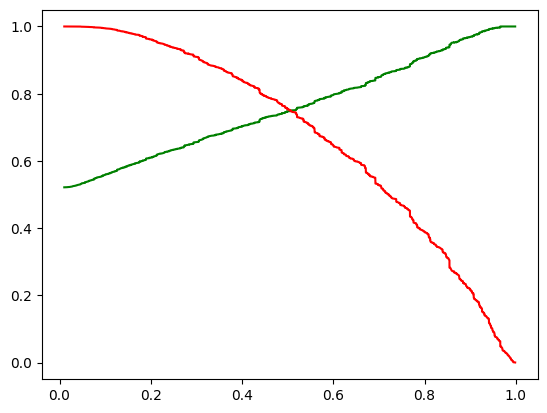

In [457]:
# Plot precision-recall curve
p, r, thresholds = precision_recall_curve(y_train_pred_final.Stayed, y_train_pred_final.Prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## **8. Prediction and Model Evaluation** <font color = red>[30 marks]</font>

Use the model from the previous step to make predictions on the validation set with the optimal cutoff. Then evaluate the model's performance using metrics such as accuracy, sensitivity, specificity, precision, and recall.

### **8.1 Make predictions over validation set** <font color = red>[15 marks]</font>

8.1.1 Select relevant features for validation set <font color="red">[2 Marks]</font>



In [458]:
# Select the relevant features for validation set
X_test1 = X_test[col]
X_test1.head()

Gender_Male  Work-Life Balance_Fair  Work-Life Balance_Poor  \
38726        False                   False                   False   
24574        False                   False                   False   
21775         True                   False                    True   
42700         True                   False                   False   
60433        False                   False                   False   

       Job Satisfaction_Low  Job Satisfaction_Very High  \
38726                 False                        True   
24574                 False                       False   
21775                 False                       False   
42700                 False                       False   
60433                 False                        True   

       Performance Rating_Below Average  Performance Rating_Low  Overtime_Yes  \
38726                             False                   False         False   
24574                             False                   False         False   
21775                             False                   False         False   
42700                             False                   False         False   
60433                             False                   False         False   

       Education Level_PhD  Marital Status_Single  Job Level_Mid  \
38726                False                  False          False   
24574                False                  False          False   
21775                False                   True           True   
42700                False                  False          False   
60433                False                   True          False   

       Job Level_Senior  Remote Work_Yes  Company Reputation_Fair  \
38726              True            False                    False   
24574              True            False                    False   
21775             False            False                    False   
42700             False            False                     True   
60433             False            False                    False   

       Company Reputation_Poor  
38726                    False  
24574                    False  
21775                    False  
42700                    False  
60433                    False

In [459]:
X_test1 = X_test1.apply(binary_map)

8.1.2 Add constant to X_validation <font color="red">[2 Marks]</font>

In [460]:
# Add constant to X_validation
X_test_sm = sm.add_constant(X_test1)
X_test_sm.head()

const  Gender_Male  Work-Life Balance_Fair  Work-Life Balance_Poor  \
38726    1.0            0                       0                       0   
24574    1.0            0                       0                       0   
21775    1.0            1                       0                       1   
42700    1.0            1                       0                       0   
60433    1.0            0                       0                       0   

       Job Satisfaction_Low  Job Satisfaction_Very High  \
38726                     0                           1   
24574                     0                           0   
21775                     0                           0   
42700                     0                           0   
60433                     0                           1   

       Performance Rating_Below Average  Performance Rating_Low  Overtime_Yes  \
38726                                 0                       0             0   
24574                                 0                       0             0   
21775                                 0                       0             0   
42700                                 0                       0             0   
60433                                 0                       0             0   

       Education Level_PhD  Marital Status_Single  Job Level_Mid  \
38726                    0                      0              0   
24574                    0                      0              0   
21775                    0                      1              1   
42700                    0                      0              0   
60433                    0                      1              0   

       Job Level_Senior  Remote Work_Yes  Company Reputation_Fair  \
38726                 1                0                        0   
24574                 1                0                        0   
21775                 0                0                        0   
42700                 0                0                        1   
60433                 0                0                        0   

       Company Reputation_Poor  
38726                        0  
24574                        0  
21775                        0  
42700                        0  
60433                        0

8.1.3 Make predictions over validation set <font color="red">[3 Marks]</font>

In [461]:
# Make predictions on the validation set and store it in the variable 'y_validation_pred'
y_validation_pred = res.predict(X_test_sm)
# View predictions
y_validation_pred[:10]

38726    0.907654
24574    0.940935
21775    0.237373
42700    0.569507
60433    0.126088
20041    0.555238
63567    0.782291
41761    0.355160
65927    0.772659
63897    0.534816
dtype: float64

8.1.4 Create DataFrame with actual values and predicted values for validation set <font color="red">[5 Marks]</font>

In [462]:
# Convert 'y_validation_pred' to a DataFrame 'predicted_probability'
predicted_probability = pd.DataFrame(y_validation_pred)
# Convert 'y_validation' to DataFrame 'actual'
actual = pd.DataFrame(y_test)
# Remove index from both DataFrames 'actual' and 'predicted_probability' to append them side by side
y_test_pred_final = pd.concat([actual, predicted_probability], axis=1)
y_test_pred_final.head()

Stayed         0
38726    True  0.907654
24574    True  0.940935
21775    True  0.237373
42700    True  0.569507
60433   False  0.126088

In [463]:
y_test_pred_final=y_test_pred_final.rename(columns={0:'Prob'})
y_test_pred_final.head()

Stayed      Prob
38726    True  0.907654
24574    True  0.940935
21775    True  0.237373
42700    True  0.569507
60433   False  0.126088

In [464]:
y_test_pred_final['Employee ID'] = actual.index
y_test_pred_final.reset_index(drop=True, inplace=True)
y_test_pred_final.head()

Stayed      Prob  Employee ID
0    True  0.907654        38726
1    True  0.940935        24574
2    True  0.237373        21775
3    True  0.569507        42700
4   False  0.126088        60433

In [465]:
y_test_pred_final = y_test_pred_final.reindex(['Employee ID', 'Stayed', 'Prob'], axis=1)
y_test_pred_final.head()

Employee ID  Stayed      Prob
0        38726    True  0.907654
1        24574    True  0.940935
2        21775    True  0.237373
3        42700    True  0.569507
4        60433   False  0.126088

8.1.5 Predict final prediction based on the cutoff value <font color="red">[3 Marks]</font>

In [466]:
# Make predictions on the validation set using the optimal cutoff and store it in a column 'final_prediction'
y_test_pred_final['final_prediction'] = y_test_pred_final.Prob.map(lambda x: 1 if x > 0.5 else 0)
# Check the DataFrame
y_test_pred_final.head()

Employee ID  Stayed      Prob  final_prediction
0        38726    True  0.907654                 1
1        24574    True  0.940935                 1
2        21775    True  0.237373                 0
3        42700    True  0.569507                 1
4        60433   False  0.126088                 0

### **8.2 Calculate accuracy of the model** <font color = red>[2 marks]</font>

In [467]:
# Calculate the overall accuracy
metrics.accuracy_score(y_test_pred_final.Stayed, y_test_pred_final.final_prediction)

0.7356896795809542

### **8.3 Create confusion matrix and create variables for true positive, true negative, false positive and false negative** <font color = red>[5 marks]</font>

In [468]:
# Create confusion matrix
confusion_test = metrics.confusion_matrix(y_test_pred_final.Stayed, y_test_pred_final.final_prediction)
confusion_test

array([[7357, 2805],
       [2796, 8233]])

In [469]:
# Create variables for true positive, true negative, false positive and false negative
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

### **8.4 Calculate sensitivity and specificity** <font color = red>[4 marks]</font>

In [470]:
# Calculate sensitivity
TP / float(TP+FN)

np.float64(0.7533454869865405)

In [471]:
# Calculate specificity
TN / float(TN+FP)

np.float64(0.7228162109622618)

### **8.5 Calculate precision and recall** <font color = red>[4 marks]</font>

In [472]:
# Calculate precision
TP /float(TP+FP)

np.float64(0.7475462838227935)

In [473]:
# Calculate recall
TP / float (TP+FN)

np.float64(0.7533454869865405)

## Conclusion

